In [1]:
cd ..

/Users/janperina/projects/masters-thesis


In [2]:
import glob
import pandas as pd
import numpy as np
import json
import os

In [3]:
data = []
for file in sorted(glob.glob("data/pic-CSCS_LCG2/*json")):
    with open(file) as f:
        data.append(json.load(f))

In [4]:
from traced_v2.models.bernoulli import BernoulliModel

In [5]:
from traced_v2.models.normal import NormalModel

In [6]:
from collections import defaultdict

In [7]:
from traced_v2.models.trace_model import TraceModel

In [8]:
from collections import defaultdict
from traced_v2.models.normal import NormalModel

In [ ]:
trace_models = defaultdict(lambda: {})
files = defaultdict(lambda: [])
for file in data:
    if file['dest'] not in trace_models[file['src']]:
        trace_models[file['src']][file['dest']] = TraceModel(file['src'], file['dest'], mode='mean', shift=False, sigma_factor=4, ignore_zero_errors=True)
    files[file['src']].append(file)
    trace_models[file['src']][file['dest']].log(file['timestamp'], file['hops'], rtts=np.array(file['rtts']), ttls=(file['ttls']))

In [9]:
import matplotlib.pyplot as plt

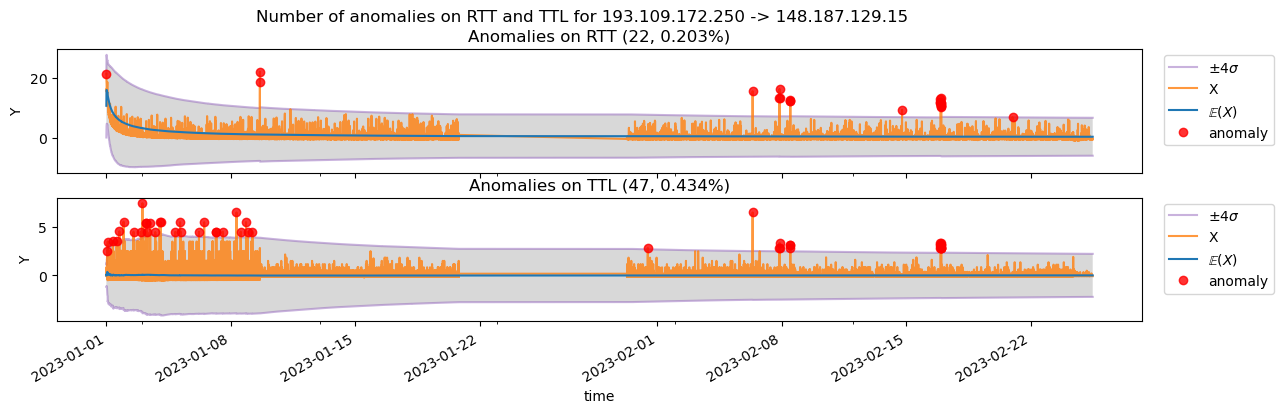

In [ ]:
fig = plt.figure(figsize=(14, 4))
trace_models['193.109.172.250']['148.187.129.15'].plot(fig=fig)
# move legend outside of plot
# plt.legend(bbox_to_anchor=(1.02, 0.95), loc=2, borderaxespad=0.)
# fig.savefig("results/figures/trace_result_no_shift_ttl_edit.png", dpi=300, bbox_inches='tight')


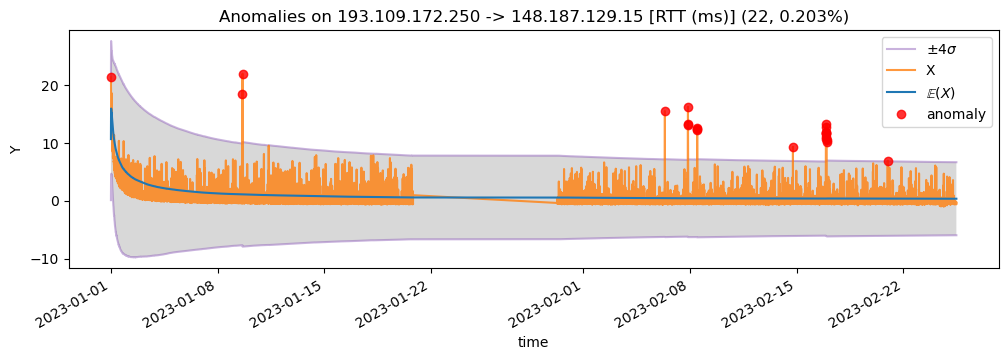

In [ ]:
fig = plt.figure(figsize=(12, 3.5))
trace_models['193.109.172.250']['148.187.129.15'].final_rtt.plot(kind='193.109.172.250 -> 148.187.129.15 [RTT (ms)]')
fig.savefig("results/figures/rtt_193.109.172.250_148.187.129.15_mean.png", dpi=300, bbox_inches='tight')

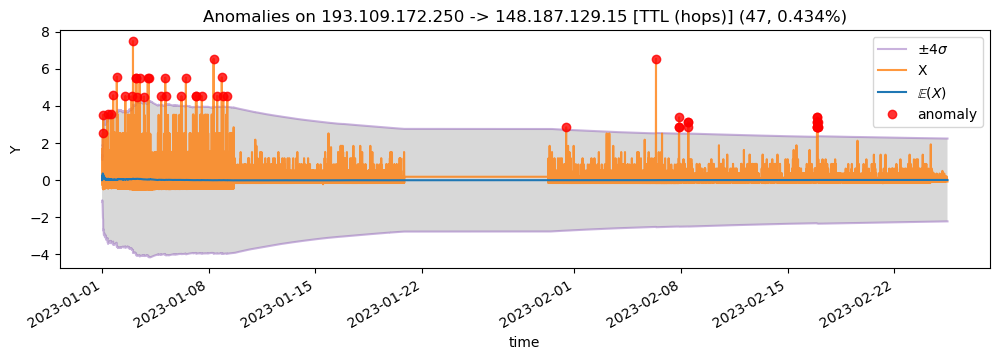

In [ ]:
fig = plt.figure(figsize=(12, 3.5))
trace_models['193.109.172.250']['148.187.129.15'].final_ttl.plot(kind='193.109.172.250 -> 148.187.129.15 [TTL (hops)]')
fig.savefig("results/figures/ttl_trace_result_no_shift_ttl_edit.png", dpi=300, bbox_inches='tight')

In [ ]:
raise Exception("Stop here")

Exception: Stop here

In [ ]:
import copy

In [ ]:
# sorted(trace_models['193.109.172.250']['148.187.129.15'].ttl_models, key=lambda x: trace_models['193.109.172.250']['148.187.129.15'].ttl_models[x].n)

['130.59.36.70',
 '130.59.37.154',
 '130.59.37.145',
 '130.59.36.246',
 '130.59.38.201',
 '130.59.39.150',
 '130.59.36.102',
 '148.187.0.10',
 '130.206.212.22',
 '130.206.212.21',
 '130.206.245.2',
 '62.40.98.96',
 '62.40.98.93',
 '62.40.98.220',
 '62.40.98.223',
 '62.40.98.238',
 '62.40.124.22',
 '148.187.129.15',
 '62.40.98.227',
 '62.40.98.236',
 '130.206.214.97',
 '84.88.16.105',
 '62.40.125.134',
 '130.59.38.70',
 '148.187.0.2',
 '192.168.50.58',
 '193.109.172.254']

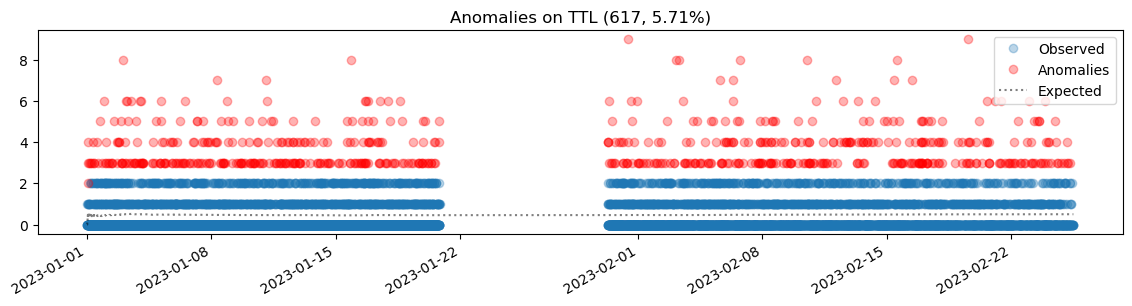

In [ ]:
fig = plt.figure(figsize=(14, 3))
trace_models['193.109.172.250']['148.187.129.15'].ttl_models[ '148.187.129.15'].plot(ax=fig.gca(), kind='TTL')

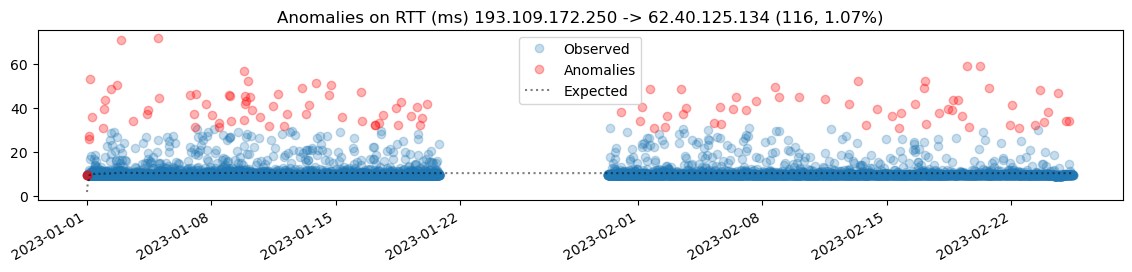

In [ ]:
# fig, (ax, ax2) = plt.subplots(1,2, figsize=(14, 3))
fig = plt.figure(figsize=(14, 2.5))
ax = plt.gca()
model.plot(ax=ax, kind='RTT (ms) 193.109.172.250 -> 62.40.125.134')

fig.savefig("results/figures/rtt_model_single.png", dpi=300, bbox_inches='tight')


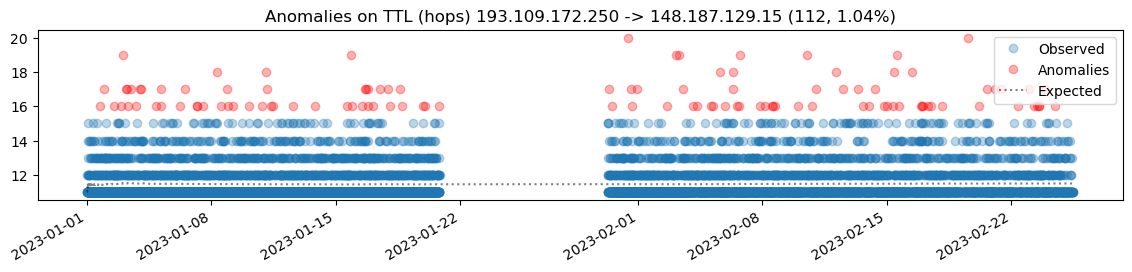

In [ ]:
# fig, (ax, ax2) = plt.subplots(1,2, figsize=(14, 3))
fig = plt.figure(figsize=(14, 2.5))
ax = plt.gca()
trace_models['193.109.172.250']['148.187.129.15'].ttl_models[ '148.187.129.15'].plot(ax=ax, kind='TTL (hops) 193.109.172.250 -> 148.187.129.15')

fig.savefig("results/figures/ttl_model_single.png", dpi=300, bbox_inches='tight')


In [ ]:
model = copy.deepcopy(trace_models['193.109.172.250']['148.187.129.15'].ttl_models['62.40.125.134'])

NameError: name 'copy' is not defined

In [ ]:
# model.anomalies = [False] * len(model.anomalies)

NameError: name 'model' is not defined

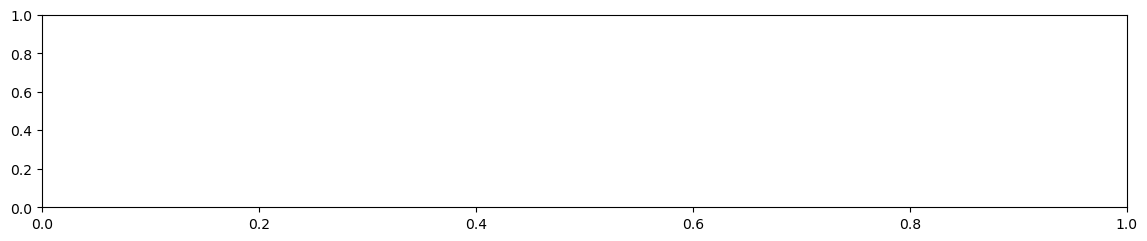

In [ ]:
# fig, (ax, ax2) = plt.subplots(1,2, figsize=(14, 3))
fig = plt.figure(figsize=(14, 2.5))
ax = plt.gca()
model.plot(ax=ax, kind='RTT (ms) 193.109.172.250 -> 62.40.125.134')
# ax.set_title("RTT (ms) 193.109.172.250 -> 62.40.125.134");

# ax2.set_ylabel("Probability")
# ymin, ymax = ax.get_ylim()
# print(ymin, (ymin+ymax_/2), ymax)
# print(self.sf(ymin),self.sf((ymin+ymax_/2)), self.sf(ymax))

# ax2.set_ylim((model.sf(ymin),model.sf(ymax)))
# ax2.set_yticks([model.sf(x) for x in np.linspace(ymax, ymin, 30)])
# ax2.
# x = np.linspace(ymin, ymax, 30)
# ax2.plot(x, [model.sf(i) for i in x ])
# tmp = model.to_frame()
# l = model.lambdas[-1]
# t = np.log(4)/l + 1.5*np.log(3)/l
# plt.hlines(t, xmin=tmp.index.min(), xmax=tmp.index.max(), color='r', linestyle='--')

# fig.gca().set_yscale('log')
fig.savefig("results/figures/rtt_model_single.png", dpi=300, bbox_inches='tight')


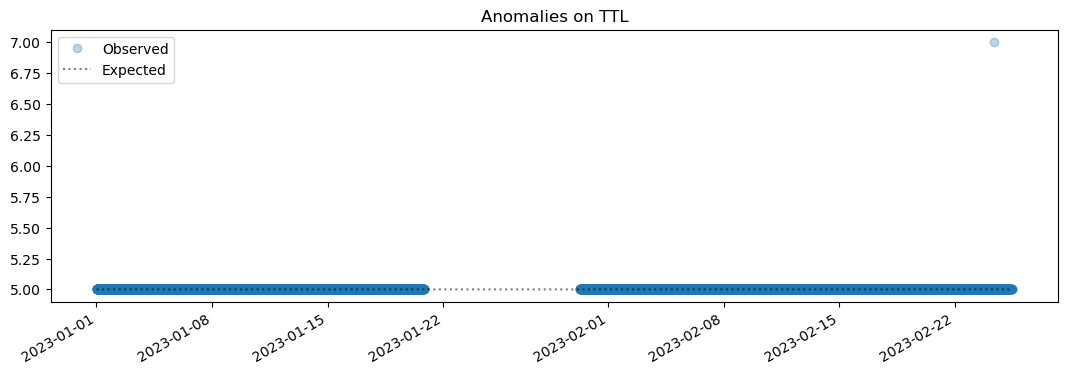

In [ ]:
fig = plt.figure(figsize=(13, 4))
trace_models['193.109.172.250']['148.187.129.15'].ttl_models['62.40.125.134'].plot(ax=fig.gca(), kind='TTL')

In [ ]:
tmp = trace_models['193.109.172.250']['148.187.129.15'].to_frame()
# tmp[['trace_rtt_anomalies', 'trace_ttl_anomalies']]

In [ ]:
tmp['i'] = range((tmp.shape[0]))

In [ ]:
ttl_cols = list(tmp.columns[tmp.columns.str.contains('ttl')]) + ['i']
rtt_cols = list(tmp.columns[tmp.columns.str.contains('rtt')]) + ['i']


In [ ]:
def d(x):
    c = [i for i in x if i]
    n = max(len(c), 2)
    return np.sum(c)/n

In [ ]:
print(tmp[tmp['trace_ttl_anomalies']][ttl_cols].iloc[-20:, :-2].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & trace_ttl_observed_values & trace_ttl_expected_values & trace_ttl_sigmas & trace_ttl_anomalies & ttl_sum_errors & ttl_mean_errors \\
\midrule
2023-01-08 22:59:05 & 4.531934 & -0.000215 & 0.992550 & True & 4.531934 & 0.411994 \\
2023-01-09 05:18:11 & 4.534293 & -0.002484 & 0.990360 & True & 4.534293 & 0.412208 \\
2023-01-31 11:05:27 & 2.846271 & -0.003042 & 0.679677 & True & 8.538813 & 0.776256 \\
2023-02-06 08:37:37 & 6.529532 & 0.001709 & 0.634305 & True & 6.529532 & 0.384090 \\
2023-02-07 20:45:14 & 2.881653 & 0.001932 & 0.625339 & True & 11.526614 & 0.823330 \\
2023-02-07 20:56:54 & 2.881270 & 0.002307 & 0.626159 & True & 11.525080 & 0.823220 \\
2023-02-07 20:58:58 & 3.380821 & 0.002747 & 0.627301 & True & 13.523285 & 0.965949 \\
2023-02-08 11:25:54 & 3.130129 & 0.003384 & 0.624253 & True & 12.520514 & 0.894322 \\
2023-02-08 11:26:22 & 2.879752 & 0.003753 & 0.625060 & True & 11.519006 & 0.822786 \\
2023-02-08 11:36:59 & 3.129343 & 0.004154 & 0.62

In [ ]:
print(tmp[~tmp['trace_rtt_anomalies']&tmp['trace_ttl_anomalies']][['trace_rtt_observed_values', 'trace_rtt_expected_values', 'rtt_sum_errors', 'trace_ttl_observed_values', 'trace_ttl_expected_values', 'ttl_sum_errors']].round(2).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & trace_rtt_observed_values & trace_rtt_expected_values & rtt_sum_errors & trace_ttl_observed_values & trace_ttl_expected_values & ttl_sum_errors \\
\midrule
2023-01-01 01:15:03 & 12.960000 & 14.960000 & 142.560000 & 2.530000 & 0.360000 & 2.530000 \\
2023-01-01 01:55:21 & 10.730000 & 14.250000 & 118.050000 & 3.520000 & 0.270000 & 3.520000 \\
2023-01-01 08:47:20 & 7.550000 & 8.460000 & 83.000000 & 3.570000 & 0.060000 & 3.570000 \\
2023-01-01 13:56:26 & 2.440000 & 6.730000 & 26.820000 & 3.570000 & 0.040000 & 3.570000 \\
2023-01-01 17:38:55 & 2.180000 & 5.890000 & 23.960000 & 4.570000 & 0.030000 & 4.570000 \\
2023-01-01 23:19:10 & 2.320000 & 5.050000 & 25.550000 & 5.570000 & 0.030000 & 5.570000 \\
2023-01-02 12:45:30 & 1.220000 & 3.840000 & 13.420000 & 4.530000 & 0.050000 & 4.530000 \\
2023-01-02 22:36:07 & 6.130000 & 3.320000 & 67.430000 & 4.510000 & 0.060000 & 4.510000 \\
2023-01-03 00:48:20 & 0.400000 & 3.220000 & 4.000000 & 7.490000 & 0.080000 & 7.49

In [ ]:
import random

In [ ]:
sums = []
for i in tmp[tmp['trace_ttl_anomalies']]['i'].values:
    sums.append(np.sum(np.array(data[i]['ttls'])-np.arange(1, len(data[i]['ttls'])+1)))

In [ ]:
sample = []
for i in tmp[~tmp['trace_ttl_anomalies']]['i'].values:
    sample.append(np.sum(np.array(data[i]['ttls'])-np.arange(1, len(data[i]['ttls'])+1)))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(tmp['trace_rtt_anomalies'], tmp['trace_ttl_anomalies'])

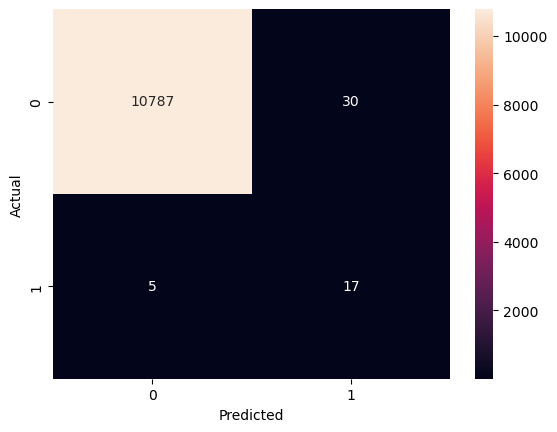

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# cm = cm.astype(float)/ cm.sum(axis=1, keepdims=True).astype(float)

sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
rtts = []
ttls = []
ttl_diff = []
ts = []
src = '193.109.172.250'
dest = '148.187.129.15'
for file in data:
    if file['src'] != src:
        continue
    for i, (hop, ttl, rtt) in enumerate(zip(file['hops'],file['ttls'], file['rtts'])):
        if hop != dest:
            continue
        rtts.append(rtt)
        ttls.append(ttl)
        ttl_diff.append(ttl-i-1)
        ts.append(file['timestamp'])

In [ ]:
from traced_v2.models.poisson import PoissonModel
from traced_v2.models.exponential import ExponentialModel

In [ ]:
x = np.arange(0, 100, 5)
y = np.arange(0, 100, 5)
# z = hmean([x, y], axis=0)    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hmean(x, y):
    return 2 / (1/x + 1/y)

def mean(x, y):
    return (x+y)/2

# Example data
x = np.linspace(0.1, 10, 100)
y = np.linspace(0.1, 10, 100)

# Create meshgrid
X, Y = np.meshgrid(x[1:], y[1:])

# Compute harmonic mean values
hmean_values = np.vectorize(hmean)(X, Y)
mean_values = np.vectorize(mean)(X, Y)

# Create subplots
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 3), sharey=False)

# Plot heatmap of harmonic mean
im1 = ax1.imshow(hmean_values, cmap='hot')
ax1.set_title('Heatmap of Harmonic Mean')
fig.colorbar(im1, ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.invert_yaxis()  # Reverse the y-axis

# Plot heatmap of mean
im2 = ax2.imshow(mean_values, cmap='hot')
ax2.set_title('Heatmap of Mean')
fig.colorbar(im2, ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.invert_yaxis()  # Reverse the y-axis

# Show the plot
plt.show()
fig.savefig("results/figures/harmonic_mean_mean_comp.png", dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(3, 3))
ax1=plt.gca()
im1 = ax1.imshow(hmean_values/mean_values, cmap='hot')
ax1.set_title('Heatmap of Harmonic Mean')
fig.colorbar(im1, ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.invert_yaxis()  # Revers

In [ ]:
tm = TraceModel(1,2, mode='mean')

In [ ]:
tmp[tmp['trace_rtt_anomalies']&tmp['trace_ttl_anomalies']][['trace_rtt_observed_values', 'trace_rtt_expected_values','trace_ttl_observed_values', 'trace_ttl_expected_values']]

In [ ]:
tmp[tmp['trace_rtt_anomalies']&~tmp['trace_ttl_anomalies']][['trace_rtt_observed_values', 'trace_rtt_expected_values','trace_ttl_observed_values', 'trace_ttl_expected_values']]

In [ ]:
from scipy.stats import hmean
from traced_v2.models.exponential import ExponentialModel
from traced_v2.models.poisson import PoissonModel
from traced_v2.models.normal import NormalModel

In [ ]:
tm = TraceModel(1,2, mode='mean')   

In [ ]:
nms = defaultdict(lambda: defaultdict(lambda: {}))

psn = defaultdict(lambda: defaultdict(lambda: {}))
errors = defaultdict(lambda: defaultdict(lambda: []))
weighted = defaultdict(lambda: defaultdict(lambda: []))

e_mean = []
e_seq = []
e_anom = []
masked_rtt=[]
masked_ttl=[]

for file in data:
    src = file['src']
    ts = file['timestamp']
    ttl_error = []
    rtt_error = []

    rtt_anomalies = []
    ttl_anomalies = []

    ttl_anoms_total = []
    rtt_anoms_total = []
    ns = []

    for hop, rtt, ttl in zip(file['hops'], file['rtts'], file['ttls']):
        if hop not in nms[src]:
            nms[src][hop] = ExponentialModel(src, hop, alpha_0=1, threshold=0.05, shift=0)
            psn[src][hop] =  PoissonModel(src, hop,  threshold=0.05, gamma=0.5, shift=0)
                #             self.rtt_models[hop] = ExponentialModel(self.src, hop, alpha_0=1, threshold=0.05)
                # self.ttl_models[hop] = PoissonModel(self.src, hop,  threshold=0.05, gamma=0.5)

        t = nms[src][hop].log(ts, rtt)
        h = psn[src][hop].log(ts, ttl)
        ttl_error.append(h.error)
        rtt_error.append(t.error)
        rtt_anomalies.append(t.is_anomaly)
        ttl_anomalies.append(h.is_anomaly)
        ttl_anoms_total.append(psn[src][hop].n_anomalies)
        rtt_anoms_total.append(nms[src][hop].n_anomalies)
        ns.append(nms[src][hop].n)

    rtt_seq_w, ttl_anom_seq_w = tm._calculate_anomaly_weights(
            rtt_anomalies, ttl_anomalies
        )
    uniform_w = np.ones_like(rtt_anomalies).astype(float)
    uniform_w /= uniform_w.sum()
    # rtt_seq_w, ttl_anom_seq_w = rtt_seq_w-1, ttl_anom_seq_w -1
    # rtt_n_anoms = np.log1p(rtt_anoms_total).astype(float)
    # rtt_n_anoms /= rtt_n_anoms.sum()
    # ttl_n_anoms = np.log1p(ttl_anoms_total).astype(float)
    # ttl_n_anoms /= ttl_n_anoms.sum()
    rtt_n_anoms =  1 - (np.array(rtt_anoms_total)+1)/(1+np.array(ns))
    rtt_n_anoms /= rtt_n_anoms.sum()
    ttl_n_anoms = 1 - (1+np.array(ttl_anoms_total))/(1+np.array(ns))
    ttl_n_anoms /= ttl_n_anoms.sum()

    masked_rtt.append(np.array(rtt_error)[np.where(rtt_anomalies)].mean() if any(rtt_anomalies) else 0)
    masked_ttl.append(np.array(ttl_error)[np.where(ttl_anomalies)].mean() if any(ttl_anomalies) else 0)

    e_mean.append(np.array(rtt_error) @ uniform_w.T)  
    e_seq.append(np.array(rtt_error) @ rtt_seq_w.T)  
    e_anom.append(np.array(rtt_error) @ rtt_n_anoms.T)  

    # final_w_rtt =  hmean([uniform_w, rtt_n_anoms, rtt_seq_w])
    # # final_w_rtt /= 3

    # final_w_ttl =  hmean([uniform_w, ttl_n_anoms, ttl_anom_seq_w])
    # # final_w_ttl /= 3

    # final_w_ttl = final_w_ttl
    # final_w_rtt = final_w_rtt

    # weighted[src][file['dest']].append(((file['ttls'], [x*y for x,y in zip(ttl_error, final_w_ttl)]), (file['rtts'], [x*y for x,y in zip(rtt_error, final_w_rtt)])))
    errors[src][file['dest']].append(((file['ttls'], ttl_error),( file['rtts'], rtt_error)))

/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_8593/2789508820.py:56: RuntimeWarning: divide by zero encountered in divide
  ttl_n_anoms /= ttl_n_anoms.sum()
/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_8593/2789508820.py:56: RuntimeWarning: invalid value encountered in divide
  ttl_n_anoms /= ttl_n_anoms.sum()


In [ ]:
import random

def generate_unique_numbers(n):
    numbers = list(range(1, n+1))
    random.shuffle(numbers)
    return numbers

indexes = generate_unique_numbers(len(errors['193.109.172.250']['148.187.129.15']))


In [ ]:
# sample = []
# for i in indexes[:1000]:
#     sample.append(errors['193.109.172.250']['148.187.129.15'][i])
step = int(len( errors['193.109.172.250']['148.187.129.15'])/13)
sample = errors['193.109.172.250']['148.187.129.15'][-300:]
step
# for i in indexes[:1000]:
#     sample.append(errors['193.109.172.250']['148.187.129.15'][i])

833

In [ ]:
A, B = zip(*sample)


In [ ]:
ttls, ttl_errors = zip(*A)
rtts, rtt_errors = zip(*B)  

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

def get_cyclic_colors(num_colors):
    """
    Returns a list of `num_colors` cyclic discrete colors for use in `matplotlib.pyplot`.
    """
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    color_cycle = cycle(colors)
    return color_cycle

color_cycle = get_cyclic_colors(14)
 



In [ ]:
from tqdm.auto import tqdm

In [ ]:
# fig = plt.figure(figsize=(13, 8))
# # for j,k in tqdm(zip(rtts, rtt_errors), total=len(rtts)):
#     plt.scatter(j, k, color=next(color_cycle), alpha=0.1)
# plt.show()

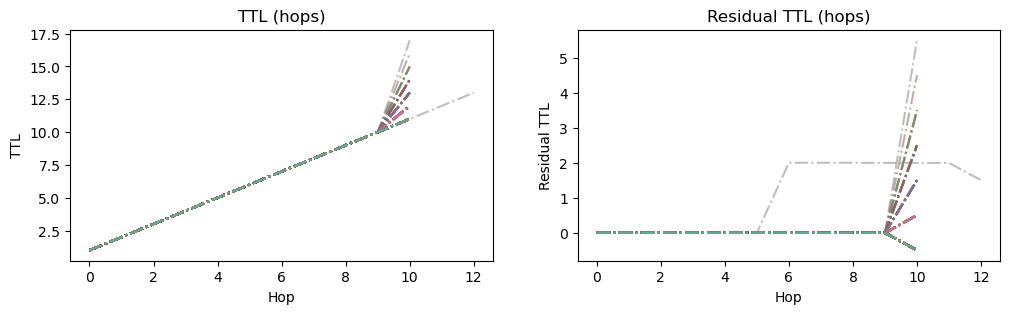

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 3))

for  ttl, ttl_error in A:
    X = np.arange(len(ttl))
    c = next(color_cycle)
    ax.plot(X, ttl, linestyle='-.', alpha=0.5, color=c)
    ax1.plot(X, ttl_error, linestyle='-.', alpha=0.5, color=c)
ax.set_title("TTL (hops)")
ax1.set_title("Residual TTL (hops)")

ax.set_xlabel("Hop")
ax1.set_xlabel("Hop")
ax.set_ylabel("TTL")
ax1.set_ylabel("Residual TTL")

# fig.suptitle("TTL and Residual TTL sequences visualisation on last 300 samples", y=1.03)
fig.savefig("results/figures/standardization_of_ttl_.png", dpi=300, bbox_inches='tight')

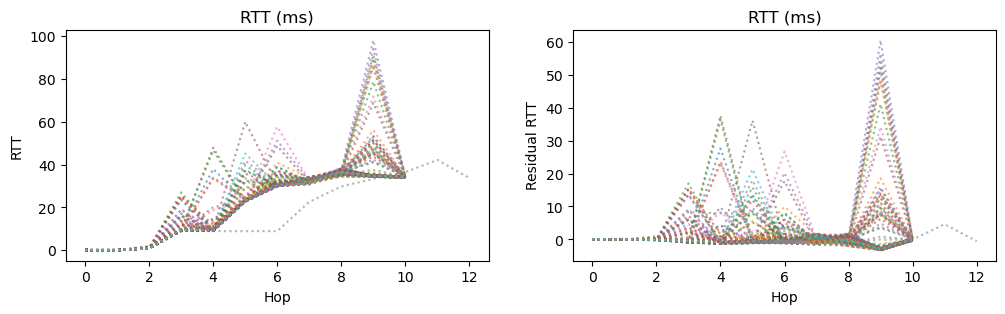

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 3))
for  ttl, ttl_error in B:
    X = np.arange(len(ttl))
    ax.plot(X, ttl, linestyle='dotted', alpha=0.6)
    ax1.plot(X, ttl_error, linestyle='dotted', alpha=0.6)
ax.set_title("RTT (ms)")
ax1.set_title("RTT (ms)")

ax.set_xlabel("Hop")
ax1.set_xlabel("Hop")
ax.set_ylabel("RTT")
ax1.set_ylabel("Residual RTT")

# fig.suptitle("RTT and Residual RTT sequences visualisation on last 250 samples", y=1.03)
fig.savefig("results/figures/standardization_of_rtt_.png", dpi=300, bbox_inches='tight')

In [ ]:
me = []
mse = []
mae = []
median_error = []
rmse = []
mape = []
mad = []
rmsle = []
for  _, rtt_errors in B:
    rtt_errors = np.array(rtt_errors)
    me.append(np.mean(rtt_errors))
    mse.append(np.mean(rtt_errors**2))
    mae.append(np.mean(np.abs(rtt_errors)))
    median_error.append(np.median(rtt_errors))
    rmse.append(np.sqrt(np.mean(rtt_errors**2)))
    # mape.append(np.mean(np.abs(rtt_errors)/rtt_errors))
    # rmsle.append(np.sqrt(np.mean(np.log1p(rtt_errors)**2)))
    mad.append(np.median(np.abs(rtt_errors)))

In [ ]:
df = pd.DataFrame({
    'Mean Error' : me,
    'Mean Squared Error': mse,
    # 'mae': mae,
    # 'median_error': median_error,
    # 'rmse': rmse,
    # 'mape': mape, 
    'Root Mean Squared Error': rmse,
    # 'mad': mad
})

In [ ]:
# normalise the values
# df = (df - df.min())/(df.max()-df.min()) 

In [ ]:
fig = plt.figure(figsize=(12, 3))
# plot each column
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(df.columns), figsize=(12, 3))
# assuming df is your dataframe
for col, ax in zip(df.columns, axs):
    df[col].plot(kind='line', title=col, ax=ax, alpha=0.75)



In [ ]:
import importlib

In [ ]:
import importlib
import sys

def m_reload():
    for k,v in sys.modules.items():
        if k.startswith('traced_v2'):
            importlib.reload(v)

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax = plt.gca() 
seen = set()
sample =  np.random.choice(loaded_files, 6000)
for item in sample:
    if item.get('src_site', None) not in sites:
        continue
    try:
        if item['src_site'] not in seen:
            seen.add(item['src_site'])
            ax.plot(item['ttls'], item['rtts'], label=f"{item['src_site']} -> {item['dest_site']}", alpha=.5, c=colors[item['src_site']])
    
        else:
            ax.plot(item['ttls'], item['rtts'], label=None, alpha=.5, c=colors[item['src_site']])

    except KeyError:
        pass
    
ax.set_ylabel("RTT (ms)")
ax.set_xlabel("TTL (hops)")
plt.title("RTT and TTL for each traceroute ")
plt.legend()

fig.savefig("results/figures/rtt_vs_ttl.svg")

plt.show()

## Paths


In [ ]:
rtts = []
ttls = []
ttl_diff = []
ts = []

src = '193.109.172.250'
dest = '148.187.129.15'

paths = set()

for file in data:
    if file['src'] != src:
        continue
    paths.add(tuple(file['hops']))

In [10]:
def jaccaard_similarity(x, y):
    if len(y) == 0:
        return 1
    return len(x.intersection(y))/len(x.union(y))

In [ ]:
counter = defaultdict(lambda: defaultdict(lambda: 0))
values = defaultdict(lambda: defaultdict(lambda: []))
for  file in data:
    for ip, rtt in zip(file['hops'], file['rtts']):
        counter[file['src']][ip] += 1
        values[file['src']][ip].append(rtt)

In [ ]:
tokens = "I love Machine Learning".split()

In [11]:
from traced_v2.utils import create_hash, remove_duplicates


In [12]:
from traced_v2.models.multinomial import MultinomialModel,ForgettingMultinomialModel

In [ ]:
ip_models = defaultdict(lambda: {})

In [ ]:
len(data)

28715

In [166]:
ip_models = defaultdict(lambda: {})
ip_model = MultinomialModel(src="CA-SFU-T2", dest="CSCS-LCG2")
lengths = []
i = 10
hashes = {}
field = 'asns'
for trace in data:
    if trace['src'] !=  '193.109.172.250':
        # print(file['src'])
        continue    
    # print("?")
    lengths.append(len(trace[field]))
    hashed = create_hash('-'.join(set(map(str, trace[field]))), 6)
    hashes[hashed] = trace[field]
    if trace['dest'] not in ip_models[trace['src']]:
        ip_models[trace['src']][trace['dest']] = MultinomialModel(src=trace['src'], dest=trace['dest'])
        
    ip_models[trace['src']][trace['dest']].log(trace['timestamp'], hashed)
    ip_model.log(trace['timestamp'], hashed)
    # i -= 1
    # if i == 0:
    #     break

In [13]:
def jaccard_similarity(a, b):
    len_a = len(a)
    len_b = len(b)
    a = set(a)
    b = set(b)
    if a.union(b) == set():
        return 0
    return len(a.intersection(b))/len(a.union(b)) # * min(len_a, len_b)/max(len_a, len_b)

In [167]:
similarities = defaultdict(lambda: defaultdict(lambda: 0))
for x in hashes:
    for y in hashes:
        similarities[x][y] = jaccard_similarity(hashes[x], hashes[y])


In [168]:
tmp_df2 = pd.DataFrame(similarities)
sorted_index2 = sorted(tmp_df2.index, key=lambda x: ip_model.category_probs[x], reverse=True)


In [165]:
tmp_df = pd.DataFrame(similarities)
sorted_index = sorted(tmp_df.index, key=lambda x: ip_model.category_probs[x], reverse=True)


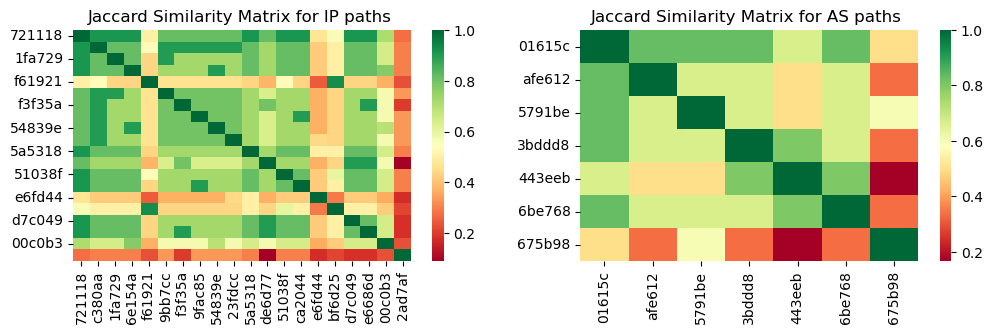

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(1,2,figsize=(12, 3))

sns.heatmap(tmp_df, cmap="RdYlGn", ax=ax)
ax.set_title("Jaccard Similarity Matrix for IP paths ")
# ax.set_xticks([])
# ax.set_yticks([])

sns.heatmap(tmp_df2, cmap="RdYlGn", ax=ax2)
ax2.set_title("Jaccard Similarity Matrix for AS paths ")
# ax2.set_xticks([])
# ax2.set_yticks([])

fig.savefig("results/figures/jaccard_similarity_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<Axes: >

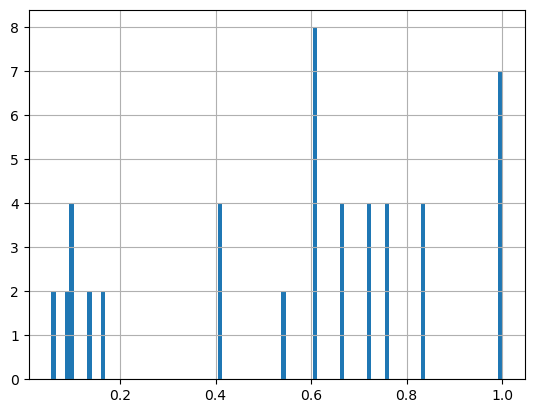

In [ ]:
tmp_df2.melt()['value'].hist(bins=100)

In [ ]:
srcs = set()
for trace in data:
    if trace['src'] ==  '2001:67c:1148:204::250':
        print(trace['dest'])
        break
    srcs.add(trace['src'])

2001:620:808:4129::15


In [ ]:
srcs

{'193.109.172.242', '193.109.172.250', '2001:67c:1148:204::250'}

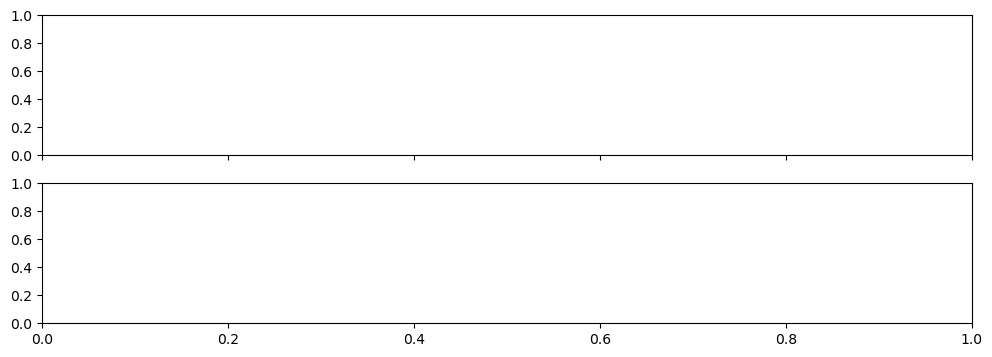

In [196]:
fig, (ax, ax2) = plt.subplots(2,1,figsize=(12, 4), sharex=True);


In [242]:
ip_models = defaultdict(lambda: {})
ip_model = ForgettingMultinomialModel(src="CA-SFU-T2", dest="CSCS-LCG2")
lengths = []
i = 10
hashes = {}
ctr = 0
field = 'hops'
uniq_paths = {}
for trace in data:
    if trace['src'] != '2001:67c:1148:204::250':
        # print(file['src'])
        continue    
    # print("?")
    lengths.append(len(trace[field]))
    hashed = create_hash('-'.join(map(str, set(trace[field]))), 6)
    
    if hashed != '99ec97':
    # if len(trace[field]) < 4:
        uniq_paths[hashed] = trace[field]
        # print(trace[field])
    if trace['path_complete']:
        ctr+=1
        if hashed not in hashes:
            hashes[hashed] = set(trace[field])
    else:
        if hashes:
            scores = [jaccard_similarity(trace[field], hashes[x]) for x in hashes]
            max_idx = np.argmax(scores)
            if scores[max_idx] > 0.75:
                hashed = list(hashes.keys())[max_idx]
            else:
                print(trace[field])
    ip_model.log(trace['timestamp'], hashed)

['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:cc:1::6e', '2001:798:cc:1::71', '2001:798:cc:1::76', '2001:798:cc:1::bd', '2001:798:12:10aa::2', '2001:620:0:c05c::2', '2001:620:0:ffaf::', '2001:620:808:4129::15']
['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:cc:1::6e', '2001:798:cc:1::71', '2001:798:cc:1::76', '2001:798:cc:1::bd', '2001:798:12:10aa::2', '2001:620:0:c05c::2', '2001:620:0:ffaf::', '2001:620:808:4129::15']
['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:cc:1::6e', '2001:798:cc:1::71', '2001:798:cc:1::76', '2001:798:cc:1::bd', '2001:798:12:10aa::2', '2001:620:0:c05c::2', '2001:620:0:ffaf::', '2001:620:808:4129::15']
['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:c

In [249]:
for k,v in uniq_paths.items():
    if jaccard_similarity(v, hashes['99ec97'])>0.8:
        continue
    print(k,jaccard_similarity(v, hashes['99ec97']), v)

93f87a 0.5 ['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:cc:1::6e', '2001:798:cc:1::71', '2001:798:cc:1::76', '2001:798:cc:1::bd', '2001:798:12:10aa::2', '2001:620:0:c05c::2', '2001:620:0:ffaf::', '2001:620:808:4129::15']
66ac3e 0.5625 ['2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:40b0:1::f071', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc::3d', '2001:798:cc:1::6e', '2001:798:cc:1::71', '2001:798:cc:1::76', '2001:798:cc:1::bd', '2001:798:12:10aa::2', '2001:620:0:c05c::2', '2001:620:0:ffaf::', '2001:620:808:4129::15']
736379 0.18181818181818182 ['2001:67c:1148:204::254', '2001:67c:1148:177::2']


In [250]:
devices = set()
for trace in data:
    devices |= set(trace['hops'])
len(devices)

45

In [228]:
a ={'2001:798:12:10aa::2', '2001:620:0:ffaf::', '2001:720:400::1000:41', '2001:798:99:1::61', '2001:798:cc:1::bd', '2001:798:cc:1::71', '2001:798:cc:1::6e', '2001:798:cc::3d', '2001:798:cc:1::76', '2001:620:808:4129::15', '2001:67c:1148:204::254', '2001:67c:1148:177::2', '2001:620:0:c05c::2'}


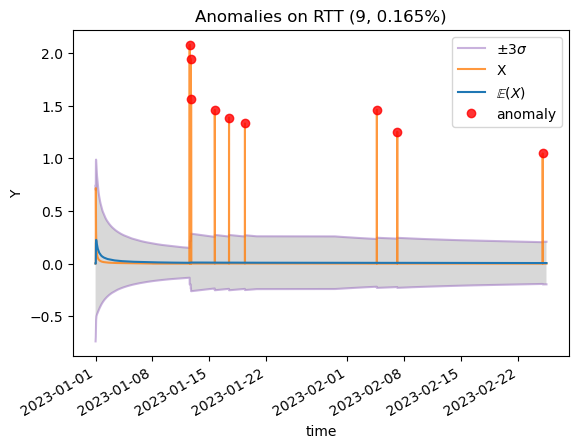

In [234]:
ip_model.information_model.plot()


In [134]:
for x, p in ip_model.category_probs.items():
    if p>0.1:
        continue
    if x not in hashes:
        print("wtf ", x)
        continue
    print(x, p, hashes[x])
# hashes

NameError: name 'ip_model' is not defined

In [198]:
ip_model.plot(ax=ax, kind='IP Path frequency (similar merged)')

In [200]:
ip_model.plot(ax=ax2, kind='AS Path frequency (similar merged)')

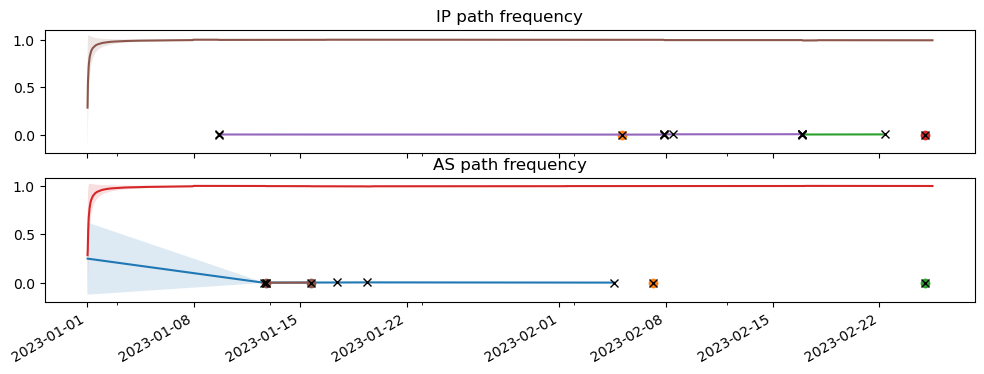

In [206]:
fig

In [205]:
ax.set_title("IP path frequency")
ax2.set_title("AS path frequency")

Text(0.5, 1.0, 'AS path frequency')

In [207]:
fig.savefig("results/figures/anomalies_categorical_merged.png", dpi=300, bbox_inches='tight')

In [48]:
ip_model.information_model.anomalies = [False] * len(ip_model.information_model.anomalies)

In [46]:
ip_model.plot(ax=ax, kind='IP Path')

In [49]:
ip_model.plot(ax=ax2, kind='AS Path')

In [60]:
ip_model.to_frame().resample('1D').size().mean()

97.16071428571429

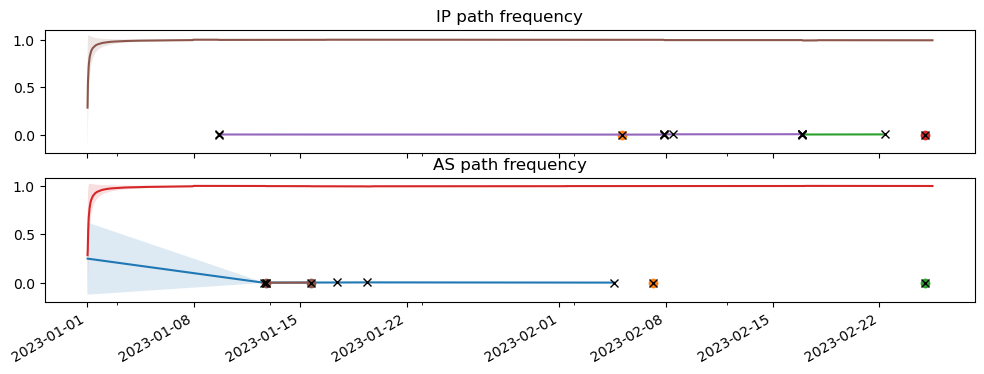

In [204]:
fig

In [61]:
fig.savefig("results/figures/ip_as_path_forgetting.png", dpi=300, bbox_inches='tight')

/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_69931/3298444036.py:9: RuntimeWarning: divide by zero encountered in log
  Z = -X * np.log(Y)
/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_69931/3298444036.py:9: RuntimeWarning: invalid value encountered in multiply
  Z = -X * np.log(Y)


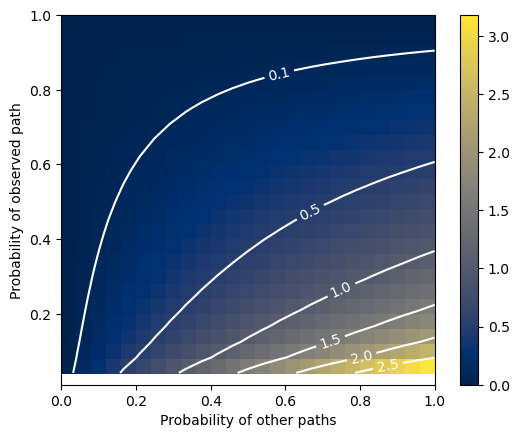

In [65]:
# Generate x and y values
x = np.linspace(0, 1, 25)
y = np.linspace(0, 1, 25)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = -X * np.log(Y)
Z[np.isnan(Z)] = 0
Z[0,0] = np.inf
# Create the heatmap with a more vivid color scale
plt.imshow(Z, cmap='cividis', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()

# Define the contour levels
c_values = [0.1, 0.5, 1.0, 1.5, 2, 2.5]

# Draw contour lines for the specified levels
contour_lines = plt.contour(X, Y, Z, levels=c_values, colors='white')

# Add labels to the contour lines
plt.clabel(contour_lines, inline=True, fontsize=10)

plt.xlabel('Probability of other paths')
plt.ylabel('Probability of observed path')
# plt.title('Vi of $x\cdot \log y$ ')
plt.gca().set_ylim(0.01, 1)
plt.gcf().savefig("results/figures/heatmap_score_cat.png", dpi=300, bbox_inches='tight')
plt.show()


In [114]:
import seaborn as sns
sns.set_theme()

In [86]:
from itertools import cycle
cmap = plt.get_cmap('Set1')
colors = cycle([cmap(i) for i in range(20)])
def plot_example(ax, categories, values_):
    c = next(colors)

    values = values_.copy()

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    # values += values[:1]  # Repeat the first value to close the circle
    # angles += angles[:1]  # Repeat the first angle to close the circle


    ax.plot(angles, values, color=c)
    ax.fill(angles, values, alpha=0.3, color=c)
    # Connect the first and last points explicitly
    ax.plot([angles[0], angles[-1]], [values[0], values[-1]], color=c)

    # Add category labels
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)

    ax.set_yticks([0.1, 0.3, 0.5])

In [129]:
def calculate_score(x,p):
    return -np.mean([
        x*np.log(i) for i in p
    ])


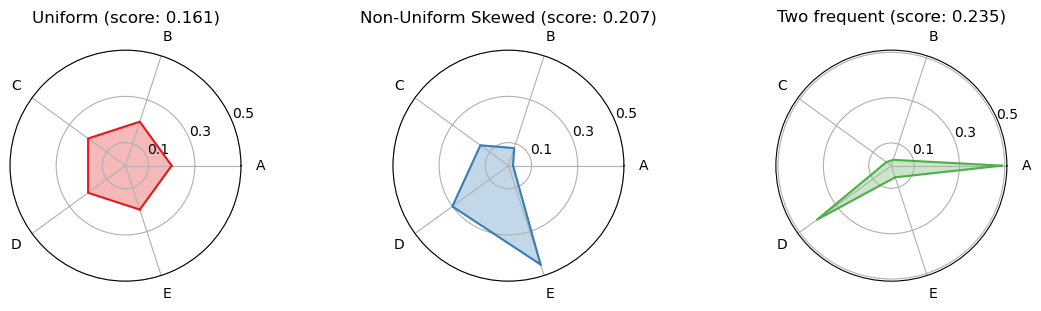

In [135]:
fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize=(14,3), subplot_kw=dict(polar=True))

# Define the categories and their values
categories = ['A', 'B', 'C', 'D', 'E']
val = 0.1
values1 = np.array([1, 1, 1, 1, 1], dtype=float)
values1 /= values1.sum()
ax.set_title(f"Uniform (score: {calculate_score(val, values1):.3f})")


values2 = np.array([.02,.08,.15,.3,.45], dtype=float)
values2 /= values2.sum()
ax2.set_title(f"Non-Uniform Skewed (score: {calculate_score(val, values2):.3f})")

values3 = np.array([18, 1, 1, 15, 2], dtype=float)
values3 /= values3.sum()
ax3.set_title(f"Two frequent (score: {calculate_score(val, values3):.3f})")

plot_example(ax, categories, values1)
plot_example(ax2, categories, values2)
plot_example(ax3, categories, values3)



plt.show()


In [137]:
np.mean(ip_model.information_model.observed_values)

0.14960572065426456

In [136]:
fig.savefig("results/figures/crossentropy_example_low.png", dpi=300, bbox_inches='tight')

In [ ]:
max(ip_model.category_probs, key=ip_model.category_probs.get)

In [149]:
ip_model.category_probs
# hashes

{'24174c': 0.7292707292707292,
 '99ec97': 0.26373626373626374,
 '8e8fd7': 0.001998001998001998,
 'f47272': 0.001998001998001998,
 '93f87a': 0.004995004995004995,
 'd16389': 0.001998001998001998,
 '2a77ec': 0.001998001998001998,
 'ba8f8b': 0.001998001998001998,
 'b4ca81': 0.001998001998001998,
 '66ac3e': 0.001998001998001998,
 'a62959': 0.001998001998001998,
 '736379': 0.001998001998001998}

In [153]:
for i in hashes['24174c']:
    print(i)
print('='*20)
for i in hashes['99ec97']:
    print(i)

2001:798:12:10aa::2
2001:620:0:ffaf::
2001:720:400::1000:41
2001:798:99:1::61
2001:798:cc:1::96
2001:620:808:4129::15
2001:67c:1148:204::254
2001:67c:1148:177::2
2001:798:cc:1::a9
2001:620:0:c05c::2
2001:798:12:10aa::2
2001:620:0:ffaf::
2001:720:400::1000:41
2001:798:99:1::61
2001:798:cc:1::96
2001:620:808:4129::15
2001:67c:1148:204::254
2001:67c:1148:177::2
2001:798:cc:1::a9
2001:40b0:1::f071
2001:620:0:c05c::2


In [150]:
jaccard_similarity(hashes['24174c'], hashes['99ec97'])

0.9090909090909091

In [ ]:
# 4996a5f16182
# 536c12e6ad48
# ca38beb13228
hashes['ca38beb13228']

In [ ]:
fig = plt.figure(figsize=(12, 4))
# ip_model.kl_divergence_model.anomalies = [False] * (ip_model.kl_divergence_model.n+1)
ip_model.plot(ax=fig.gca())
# plt.legend( )
plt.title(f"Probability of observing IP sequences from CA-SFU-T2 to CSCS-LCG2 ({len(ip_model.seen_categories)} unique paths)")

In [ ]:
fig = plt.figure(figsize=(12, 4))
ip_model.kl_divergence_model.plot(ax=fig.gca(), anom_label="")

In [ ]:
from scipy.stats import multinomial

In [ ]:
from scipy.stats import multinomial

In [ ]:
for src in ip_models:
    for dest in ip_models[src]:
        fig = plt.figure(figsize=(12, 4))
        ip_models[src][dest].plot()
        plt.title(f"Probability of observing IP sequences from {src} to {dest} ({len(ip_models[src][dest].seen_categories)} unique paths)")
        fig = plt.figure(figsize=(12, 4))
        ip_models[src][dest].kl_divergence_model.plot(ax=fig.gca(), anom_label="")
        print(max( ip_models[src][dest].category_probs, key= ip_models[src][dest].category_probs.get))

In [12]:
import networkx as nx

In [13]:
from traced_v2.models.graph import  GraphModel

In [115]:
x = GraphModel.get_or_create_subscription(False, True, key='test32')

In [116]:
gm = GraphModel("pic", "CSCL_LCG2", graph_subscription=)

In [138]:
for trace in data[50:]:
    if trace['ipv6']:
        continue
    gm.log(trace['timestamp'], [trace['src']]+trace['hops'])

In [126]:
your_graph = gm.graph.to_graph() 
your_graph

In [127]:

# Specify the layout algorithm
# layout = nx.spring_layout(your_graph)

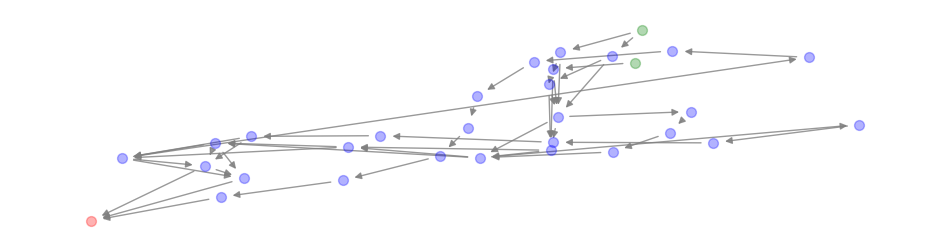

In [128]:
import networkx as nx
import matplotlib.pyplot as plt



# Create a blank canvas for your plot
fig = plt.figure(figsize=(12, 3))
ax=  plt.gca()

src_nodes = []
dest_nodes = []
other_nodes = []
for node in your_graph.nodes():
    if your_graph.in_degree()[node] == 0:
        src_nodes.append(node)
        continue
    elif your_graph.out_degree()[node] == 0:
        dest_nodes.append(node)
        continue
    other_nodes.append(node)


# Plot the graph without labels
nx.draw_networkx_nodes(your_graph, pos=layout, nodelist=src_nodes, node_size=50, node_color='g', alpha=0.3, label='Source', ax=ax)
nx.draw_networkx_nodes(your_graph, pos=layout, nodelist=dest_nodes,  node_size=50, node_color='r', alpha=0.3, label='Destination', ax=ax)
nx.draw_networkx_nodes(your_graph, pos=layout, nodelist=other_nodes, node_size=50, node_color='b', alpha=0.3, label='Other', ax=ax)

# nx.draw_networkx_labels(your_graph, pos=layout, font_size=7, ax=ax, font_color='black')

# Customize the appearance of edges (optional)
nx.draw_networkx_edges(your_graph, pos=layout, edge_color='gray', alpha=0.8, ax=ax)

# Turn off axis labels and display the plot
plt.axis('off');
# plt.show()


In [129]:
import matplotlib.patches as mpatches

legend_labels = [
    mpatches.Circle((0, 0), radius=0.1, color='r', alpha=0.3, label='Destination', ),
    mpatches.Circle((0, 0), radius=0.1,color='g',  alpha=0.3,label='Source'),
    mpatches.Circle((0, 0), radius=0.1,color='b',  alpha=0.3,label='Other')

]

In [130]:
fig.get_axes()[0].legend(handles=legend_labels, loc='lower right')


In [131]:
fig.get_axes()[0].set_title("Graph of IP paths from pic to CSCL_LCG2")

Text(0.5, 1.0, 'Graph of IP paths from pic to CSCL_LCG2')

In [132]:
fig.savefig("results/figures/graph_pic_cscl.png", dpi=300, bbox_inches='tight') 

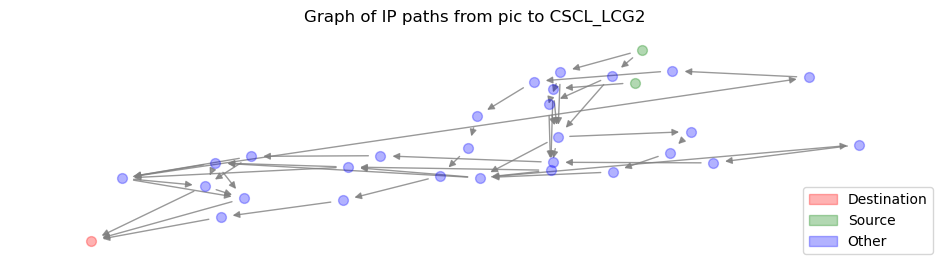

In [133]:
fig

In [14]:
from traced_v2.models.graph import  GraphModel

In [14]:
srcs = []
graph_models = defaultdict(lambda: {})
gm = GraphModel("pic", "CSCL_LCG2", graph_subscription="global_forgetting")
for trace in data:
    src, dest = trace['src'], trace['dest']

    if dest not in graph_models[src]:
        graph_models[src][dest] = GraphModel(src, dest, graph_subscription="global")
    graph_models[src][dest].log(trace['timestamp'], [src]+trace['asns'])
    # gm.log(trace['timestamp'], [src]+trace['hops'])
    srcs.append(src)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_48867/4188044780.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=c, label=src)


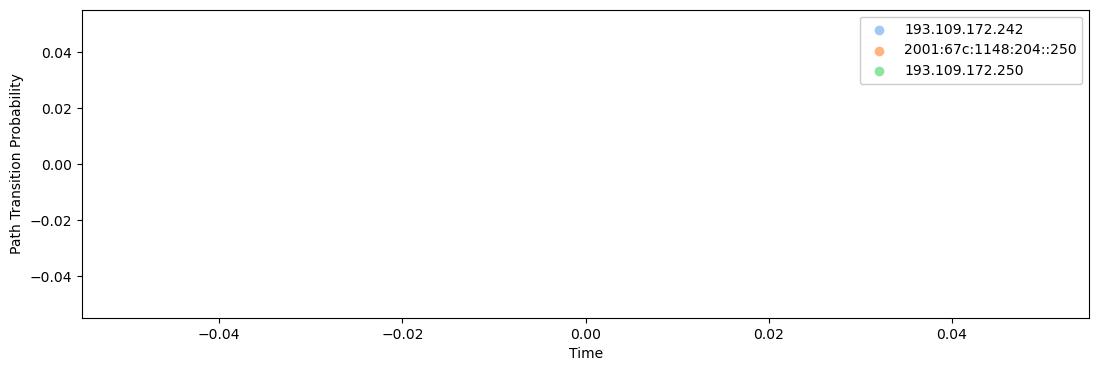

In [15]:
import seaborn as sns
from itertools import cycle
tmp = gm.to_frame(True)
tmp['source'] = srcs[1:]
# Define the palette of colors
palette = sns.color_palette("pastel")

# Create a color generator using the palette
colors = cycle(palette)

# colors = cycle(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w'])

# Use the color generator in your code
fig = plt.figure(figsize=(13, 4))
ax = plt.gca()
used_src = []
clrs =[]
for src in tmp['source'].unique():
    c = next(colors)
    tmp[tmp['source']==src].plot(marker='o', linestyle='None', y='log_prob_observed_values', c=c, label='', ax=ax, alpha=0.3)

    # tmp[tmp['source']==src].plot(marker='o', linestyle='None', y='path_prob', c=c, label='', ax=ax, alpha=0.05)
    used_src.append(src)
    clrs.append(c)

# ax.hlines(0.05, tmp.index.min(), tmp.index.max(), color='orange', linestyle='--')
ax.set_ylabel("Path Transition Probability")
ax.set_xlabel("Time")
plt.legend().remove()

for src, c in zip(used_src, clrs):
    ax.scatter([], [], c=c, label=src)

plt.legend(framealpha=1)

fig.savefig("results/figures/graph_markovian_path_prob_forgetting_log.png", dpi=300, bbox_inches='tight')


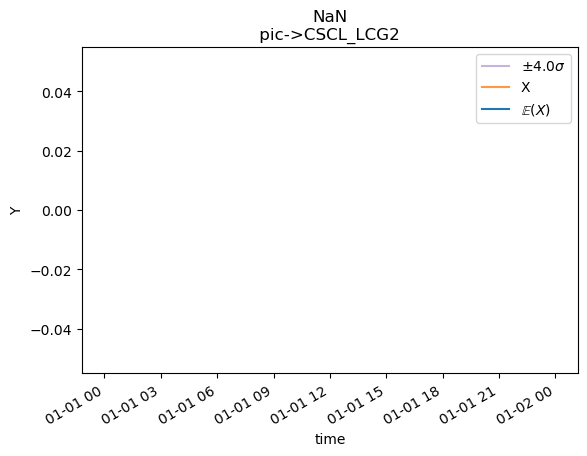

In [16]:
gm.prob_model.plot()

/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_48867/2244740529.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=c, label=src)
/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_48867/2244740529.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=c, label=src)
/var/folders/_s/_pzmy6qn25b08djfpy3jvf3w0000gn/T/ipykernel_48867/2244740529.py:12: UserWarning: *c* 

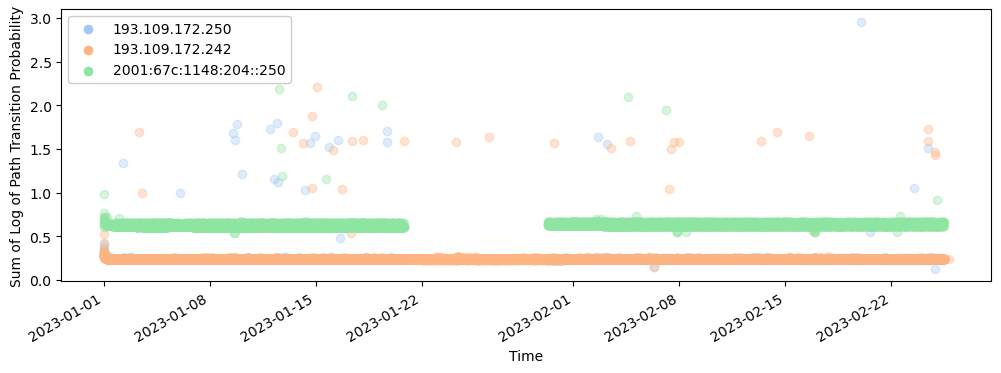

In [17]:
palette = sns.color_palette("pastel")

# Create a color generator using the palette
colors = cycle(palette)
fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

for src in graph_models:
    for dest in graph_models[src]:
        c = next(colors)
        graph_models[src][dest].to_frame()['log_prob_observed_values'].plot(ax=ax,marker='o', linestyle='None', c=c, label=f"", alpha=0.35)
        ax.scatter([], [], c=c, label=src)


ax.legend(framealpha=1)

ax.set_ylabel("Sum of Log of Path Transition Probability")
ax.set_xlabel("Time")

fig.savefig("results/figures/graph_markovian_path_prob_log.png", dpi=300, bbox_inches='tight')


<Axes: xlabel='path_prob', ylabel='log_prob_expected_values'>

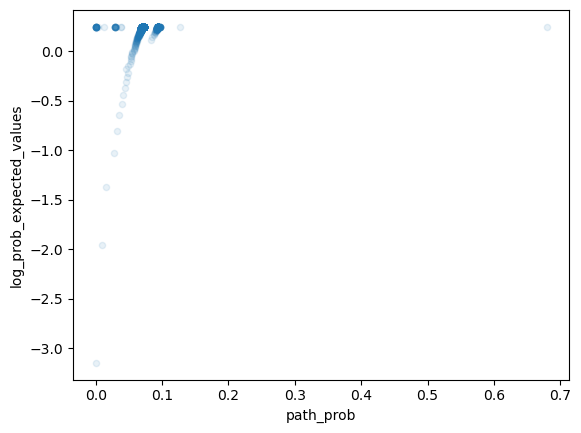

In [18]:
graph_models["193.109.172.250"]["148.187.129.15"].to_frame().plot(x='path_prob', y='log_prob_expected_values', kind='scatter', alpha=0.1)

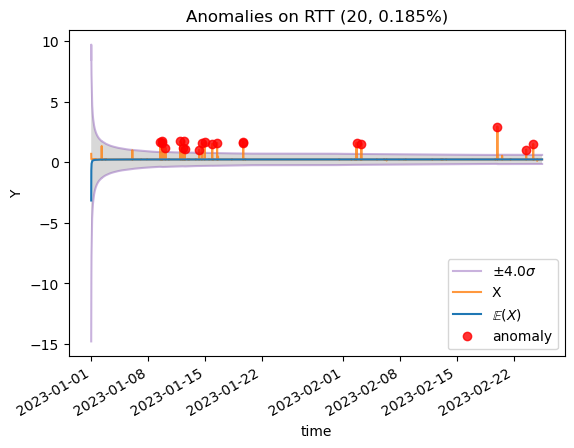

In [19]:
graph_models["193.109.172.250"]["148.187.129.15"].prob_model.plot()

In [20]:
tmp = graph_models["193.109.172.242"]["148.187.129.15"].to_frame()
tmp['i'] = range(tmp.shape[0])

In [21]:
tmp.columns

Index(['path_prob', 'log_prob_observed_values', 'log_prob_expected_values',
       'log_prob_sigmas', 'log_prob_anomalies', 'i'],
      dtype='object')

In [22]:
idx = tmp[tmp['log_prob_anomalies']].sort_values(by='log_prob_observed_values')['i'].values.tolist()

In [23]:
relevant_files = []
for file in data:
    if file['src'] == "193.109.172.242":
        relevant_files.append(file)
        

In [24]:
ok_nodes = set()
ok_paths = set()
for i in relevant_files:
    if i['path_complete'] and i['destination_reached']:
        ok_nodes |= set(i['hops'])
        ok_paths.add(tuple(i['hops']))

In [25]:
len(ok_paths)

6

In [26]:
for x in sorted(ok_paths, key=lambda x: len(x)):
    print(x)

('193.109.172.246', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.227', '62.40.98.236', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15')
('193.109.172.245', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.227', '62.40.98.236', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15')
('193.109.172.246', '192.168.50.58', '84.88.16.105', '130.206.212.22', '130.206.212.21', '130.206.245.2', '62.40.125.134', '62.40.98.227', '62.40.98.236', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15')
('193.109.172.246', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.96', '62.40.98.93', '62.40.98.220', '62.40.98.223', '62.40.98.238', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15')
('193.109.172.245', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.96', '62.40.98.93', '62.40.98.220', '62.40.98.223', '62.40.98.238', '62.40.124.22

In [27]:
ok_nodes = set()
for i in [
    ('193.109.172.245', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.227', '62.40.98.236', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15'), 
('193.109.172.246', '192.168.50.58', '84.88.16.105', '130.206.214.97', '62.40.125.134', '62.40.98.227', '62.40.98.236', '62.40.124.22', '130.59.38.70', '148.187.0.2', '148.187.129.15')]:
    ok_nodes |= set(i)

In [28]:
anomaly_paths = []
for i in idx:
    anomaly_paths.append(relevant_files[i]['hops'])

In [29]:
from collections import Counter
ctr = Counter([tuple(set(x)-ok_nodes) for x in anomaly_paths])

In [30]:
for path, cnt in ctr.items():
    print(path, cnt)    

() 23
('130.206.212.22', '130.206.245.2', '130.206.212.21') 4


In [31]:
print(relevant_files[2480]['path_complete'])
relevant_files[2480]['hops']

True


['193.109.172.245',
 '192.168.50.58',
 '84.88.16.105',
 '130.206.214.97',
 '62.40.125.134',
 '62.40.98.227',
 '62.40.98.236',
 '62.40.124.22',
 '130.59.38.70',
 '148.187.0.2',
 '148.187.129.15']

In [32]:
print(relevant_files[7799]['path_complete'])
relevant_files[7799]['hops']

False


['193.109.172.245',
 '192.168.50.58',
 '84.88.16.105',
 '130.206.214.97',
 '62.40.125.134',
 '62.40.98.227',
 '62.40.98.236',
 '62.40.124.22',
 '130.59.38.70',
 '148.187.0.2',
 '148.187.129.15']

In [33]:
relevant_files[7347]['hops']

['193.109.172.245',
 '192.168.50.58',
 '84.88.16.105',
 '130.206.214.97',
 '62.40.125.134',
 '62.40.98.227',
 '62.40.98.236',
 '62.40.124.22',
 '130.59.38.70',
 '148.187.0.2',
 '148.187.129.15']

In [35]:
jaccard_similarity(relevant_files[2480]['hops'], relevant_files[9421]['hops'])

NameError: name 'jacard_similarity' is not defined

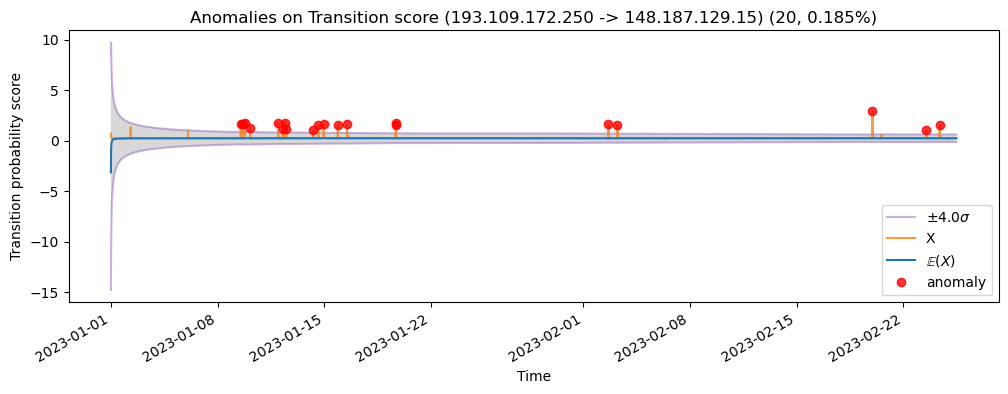

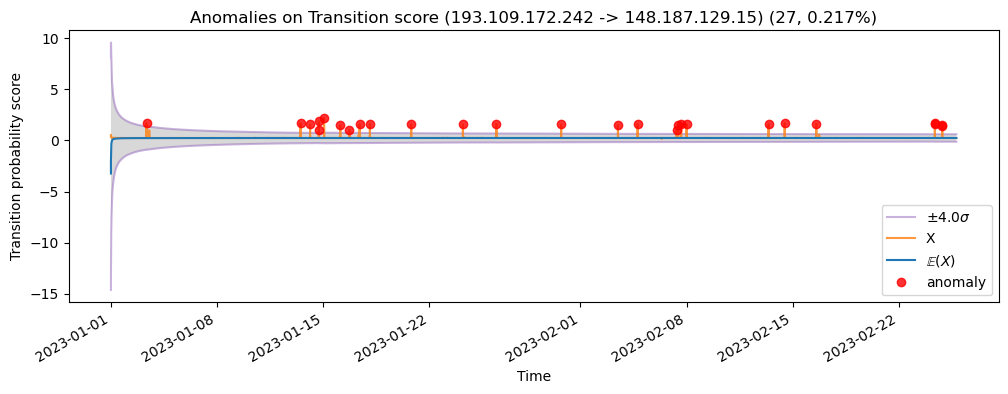

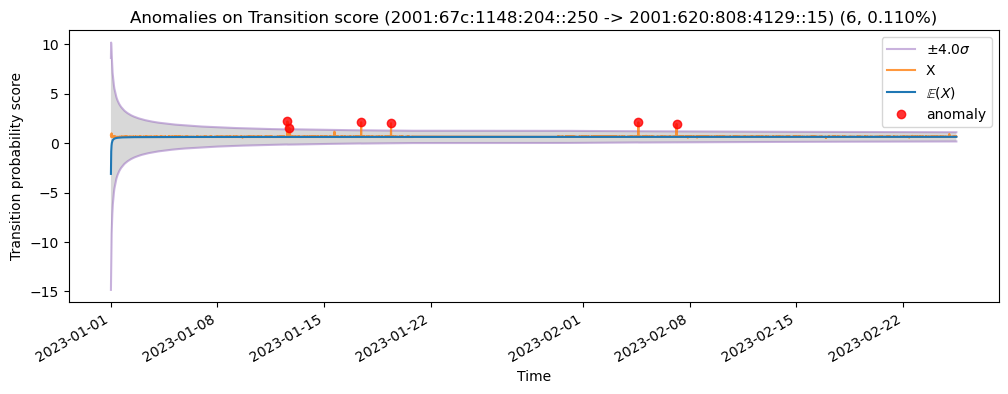

In [36]:
for src in graph_models:
    for dest in graph_models[src]:
        fig = plt.figure(figsize=(12, 4))
        ax = fig.gca()
        graph_models[src][dest].prob_model.plot(ax=ax, kind=f'Transition score ({src} -> {dest})')
        # plt.title(f"Transition score anomalies from {src} to {dest}")
        plt.ylabel("Transition probability score")
        plt.xlabel("Time")
        fig.savefig(f"results/figures/graph_markovian_path_prob_{src}_{dest}.png", dpi=300, bbox_inches='tight')
        plt.show()

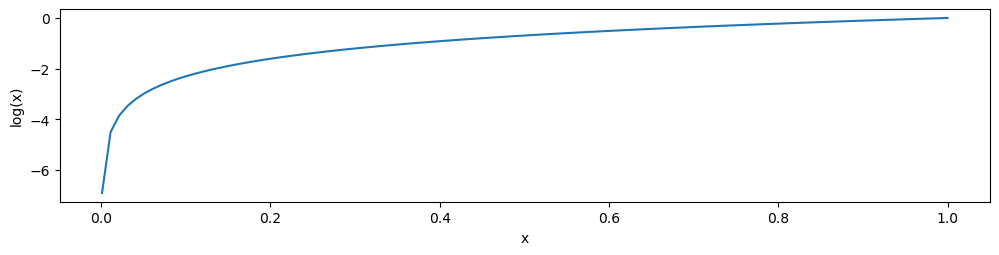

In [32]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 2.5))

# Generate x values from 0 to 1
x = np.linspace(10e-4, 1, 100)

# Calculate the logarithm of x
y = np.log(x)

# Create the plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('log(x)')
# plt.title('Logarithm Plot')
# plt.grid(True)
fig.savefig("results/figures/log_plot.png", dpi=300, bbox_inches='tight')
plt.show()


<Axes: >

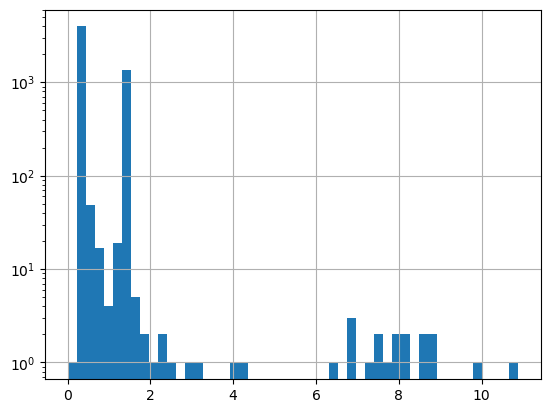

In [36]:
graph_models[src][dest].to_frame()['log_prob_observed_values'].hist(bins=50, log=True)


In [15]:
complete_paths={}
def find_closest(hashed, path, path_complete, ):
    global complete_paths
    hashes = complete_paths
    if path_complete:
        if hashed not in hashes:
            hashes[hashed] = set(path)
    else:
        if hashes:
            scores = [jaccard_similarity(path, hashes[x]) for x in hashes]
            max_idx = np.argmax(scores)
            if scores[max_idx] > 0.8:
                hashed = list(hashes.keys())[max_idx]

    return hashed

In [16]:
path_models = defaultdict(lambda: defaultdict(lambda: {}))
trans_models = defaultdict(lambda: defaultdict(lambda: {}))

key = 'hops'

for file in data:
    src, dest = file['src'], file['dest']
    if dest not in path_models[src]:
        path_models[src][dest] = ForgettingMultinomialModel(src, dest)
        trans_models[src][dest] = GraphModel(src, dest, "global_forgetting")
    hashed =  create_hash('-'.join(map(str, set(file[key]))), 6)
    path_models[src][dest].log(file['timestamp'], find_closest(hashed, file[key], file['path_complete']))
    trans_models[src][dest].log(file['timestamp'], [src]+file[key])

193.109.172.250 148.187.129.15
193.109.172.242 148.187.129.15
2001:67c:1148:204::250 2001:620:808:4129::15


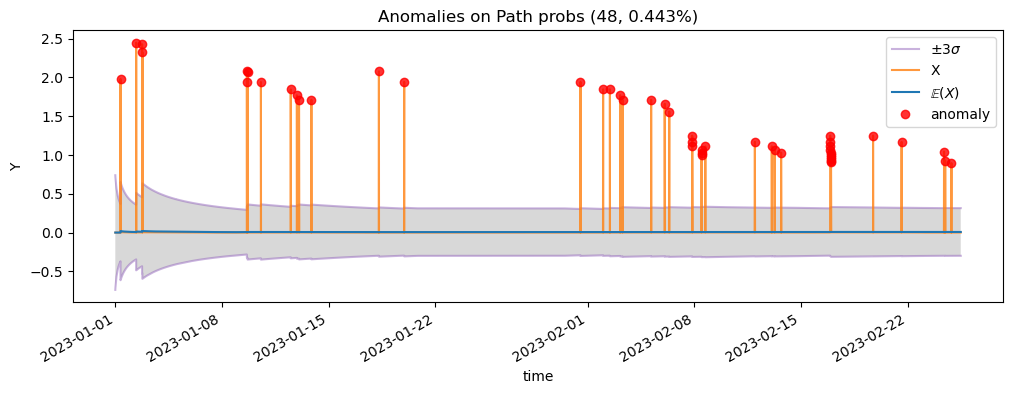

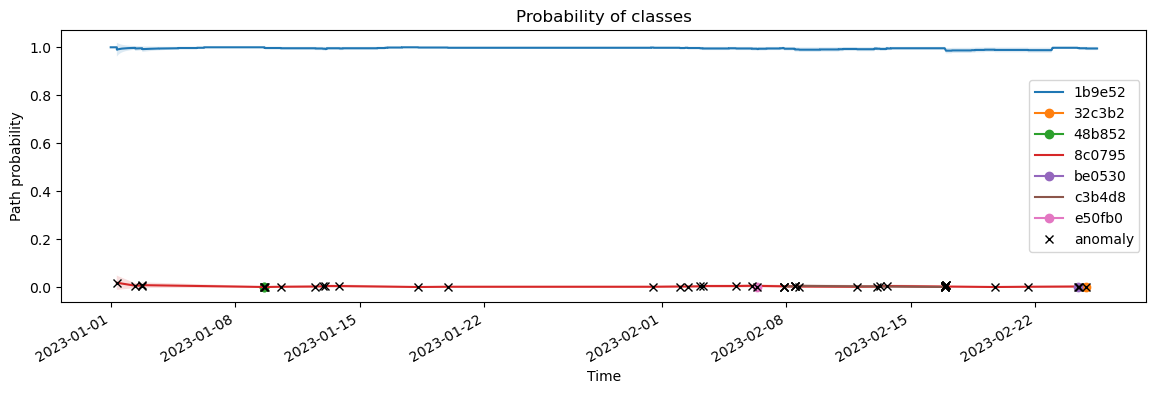

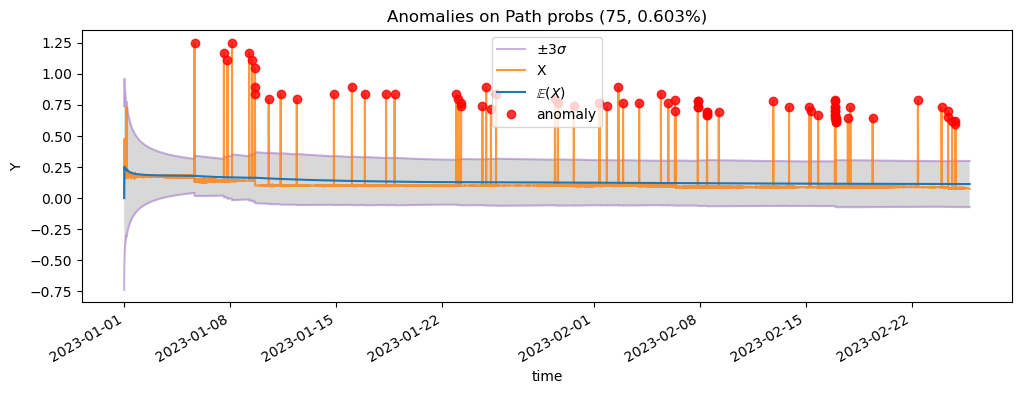

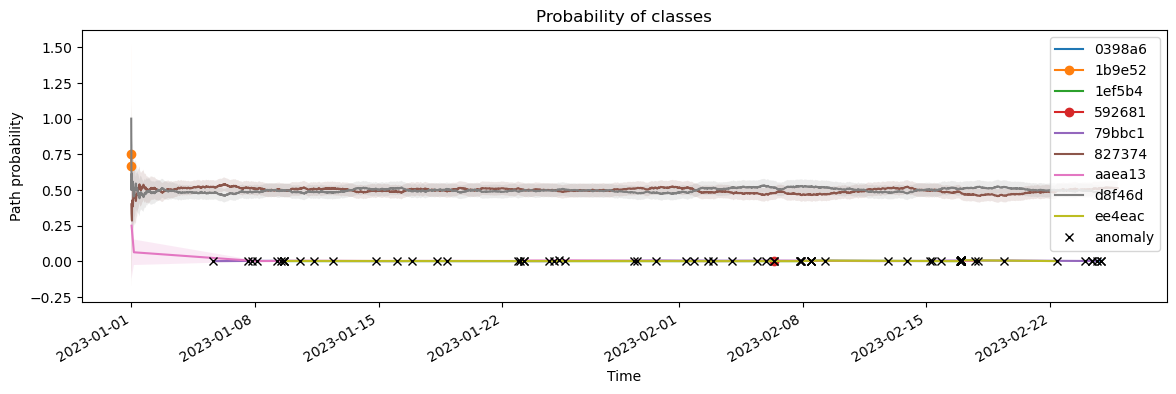

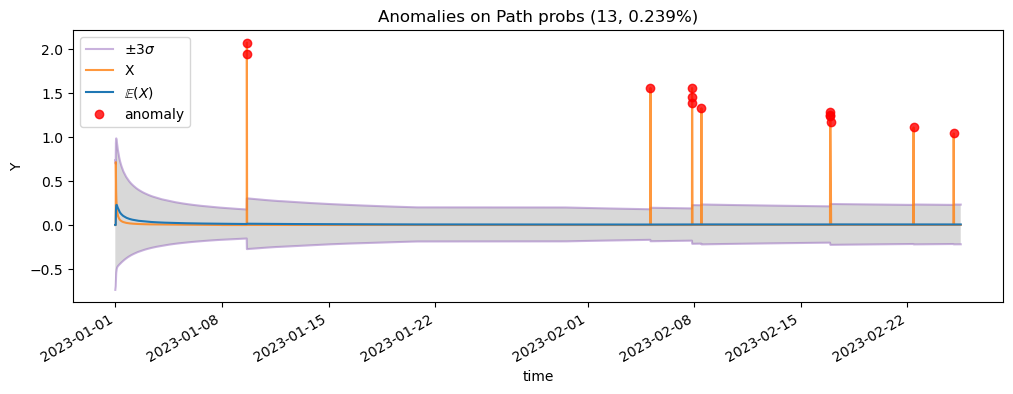

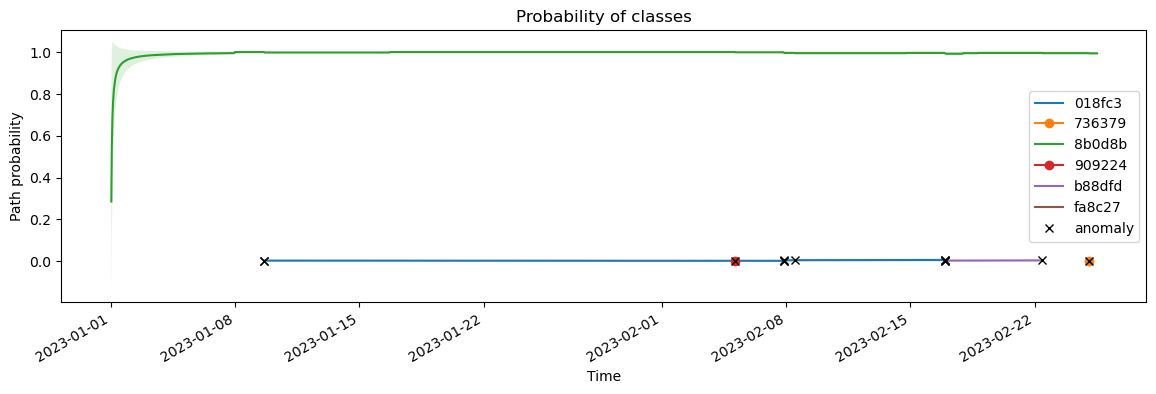

In [20]:
for src in path_models:
    for dest in path_models[src]:
        fig = plt.figure(figsize=(12, 4))
        print(src,dest)
        path_models[src][dest].information_model.plot(kind='Path probs')
        fig = plt.figure(figsize=(14, 4))
        path_models[src][dest].plot(ax=fig.gca())
        # plt.title(f"Path probabilities for {src} -> {dest}")
        plt.legend()
        plt.ylabel("Path probability")
        plt.xlabel("Time")

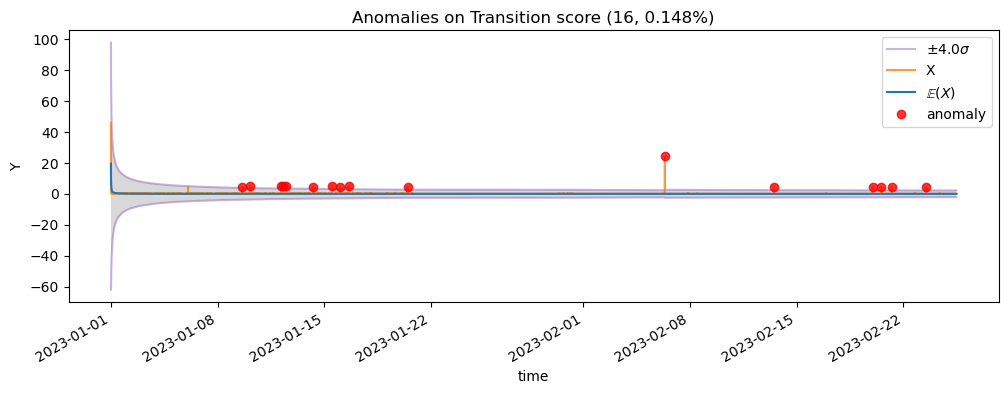

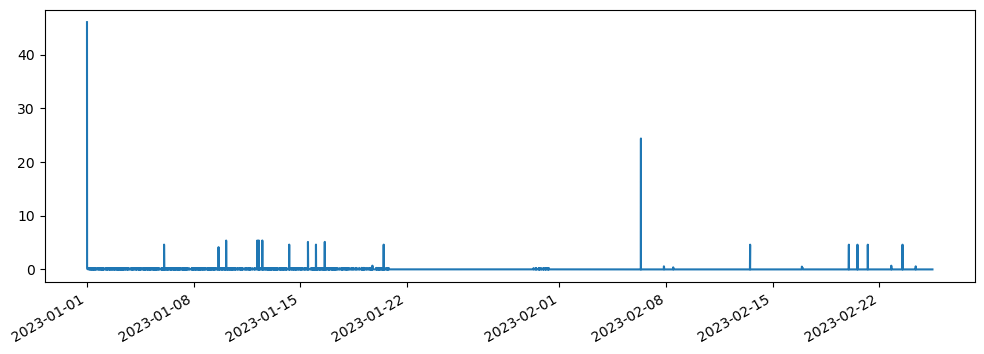

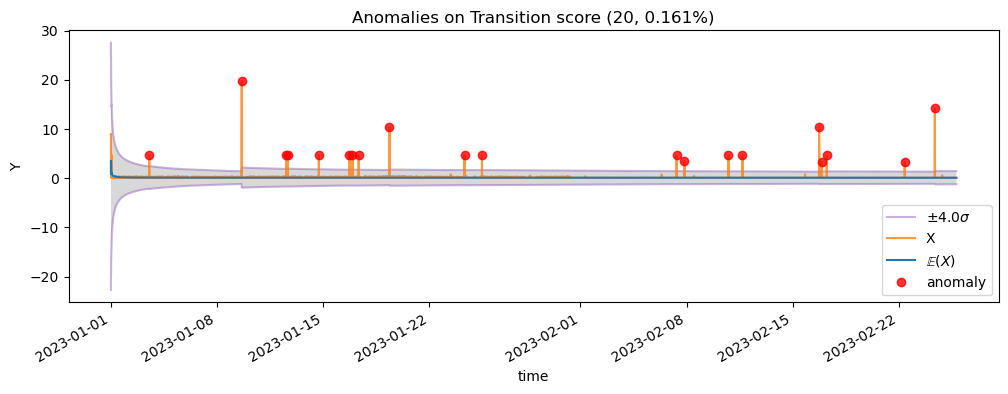

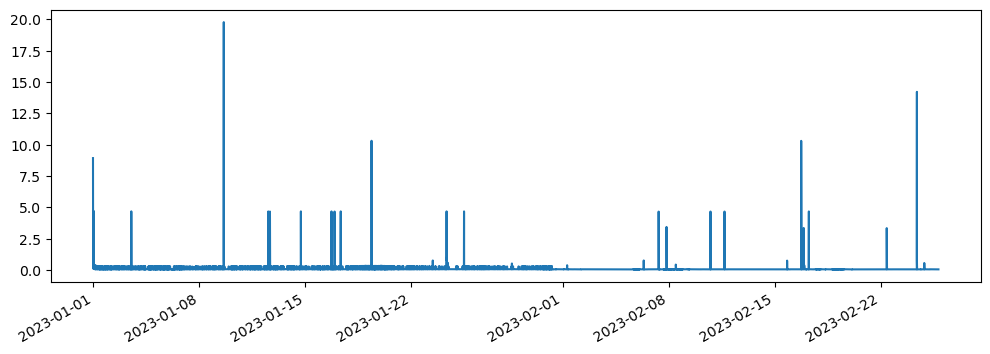

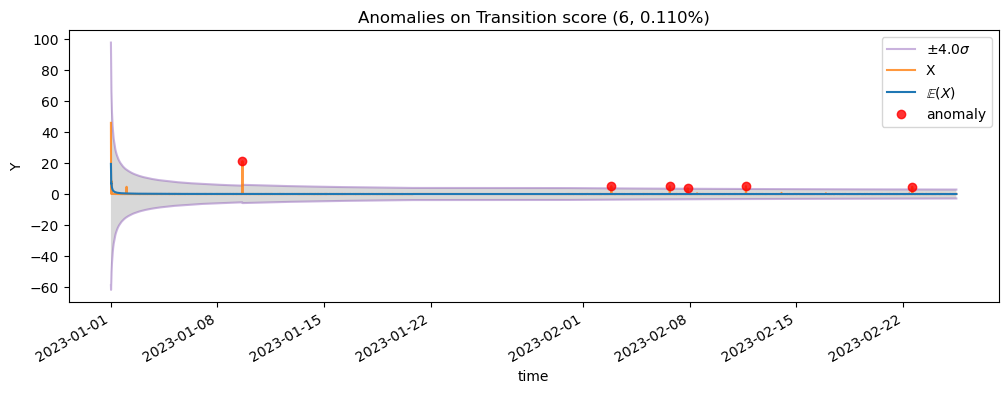

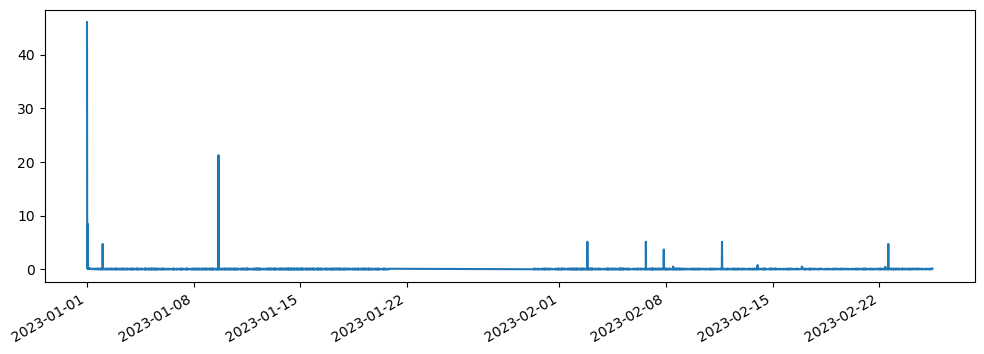

In [18]:
for src in path_models:
    for dest in path_models[src]:
        fig = plt.figure(figsize=(12, 4))
        trans_models[src][dest].prob_model.plot(kind='Transition score')
        fig = plt.figure(figsize=(12, 4))
        trans_models[src][dest].to_frame()['log_prob_observed_values'].plot()

In [19]:
from collections import Counter
values = []
for src in path_models:
    for dest in path_models[src]:
       a = path_models[src][dest].information_model.anomalies
       b = trans_models[src][dest].prob_model.anomalies
       for x,y in zip(a,b):
           values.append((x,y))
final = Counter(values)

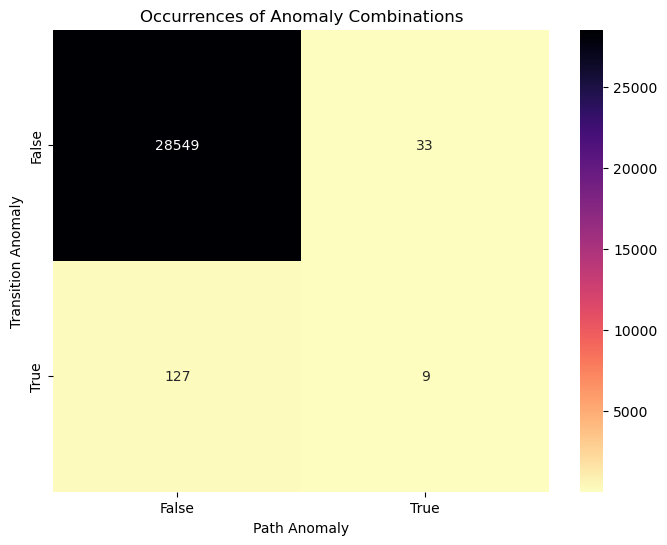

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(final, orient='index', columns=['Occurrences'])
# Reset the index and split the boolean tuple into separate columns
df.reset_index(inplace=True)
df[['Anomaly1', 'Anomaly2']] = pd.DataFrame(df['index'].tolist(), index=df.index)
# df[~df['Anomaly1'] & ~df['Anomaly2']] = np.nan
# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot_table(index='Anomaly1', columns='Anomaly2', values='Occurrences', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='magma_r', fmt='d')

# Set the title and axis labels
plt.title('Occurrences of Anomaly Combinations')
plt.xlabel('Path Anomaly')
plt.ylabel('Transition Anomaly')

# Show the heatmap
plt.show()


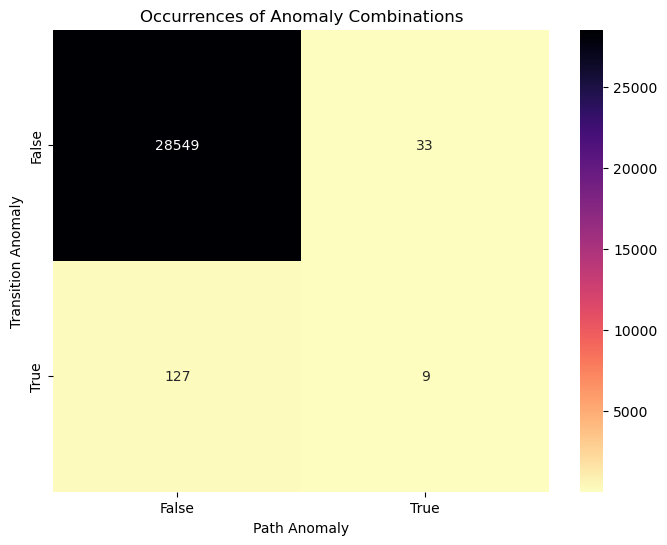

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(final, orient='index', columns=['Occurrences'])
# Reset the index and split the boolean tuple into separate columns
df.reset_index(inplace=True)
df[['Anomaly1', 'Anomaly2']] = pd.DataFrame(df['index'].tolist(), index=df.index)
# df[~df['Anomaly1'] & ~df['Anomaly2']] = np.nan
# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot_table(index='Anomaly1', columns='Anomaly2', values='Occurrences', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='magma_r', fmt='d')

# Set the title and axis labels
plt.title('Occurrences of Anomaly Combinations')
plt.xlabel('Path Anomaly')
plt.ylabel('Transition Anomaly')

# Show the heatmap
plt.show()


In [15]:
from traced_v2.trace_analyzer import MultiTraceAnalyzer

In [16]:
from tqdm.auto import tqdm

In [17]:
mta = MultiTraceAnalyzer("pic", "CSCL_LCG2")

In [18]:
for file in tqdm(data):
    mta.log(file)

  0%|          | 0/28715 [00:00<?, ?it/s]

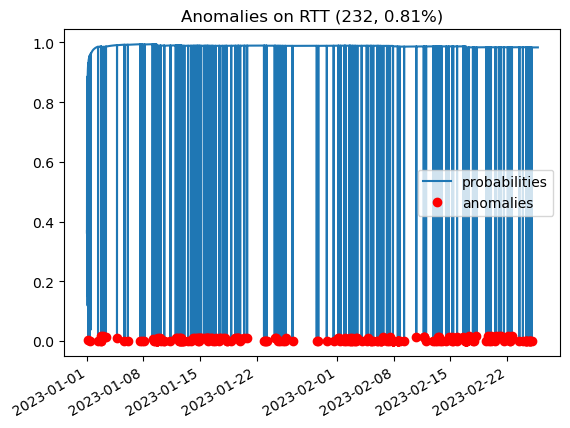

In [91]:
mta.n_anomalies.plot_sf_anoms()

<Axes: >

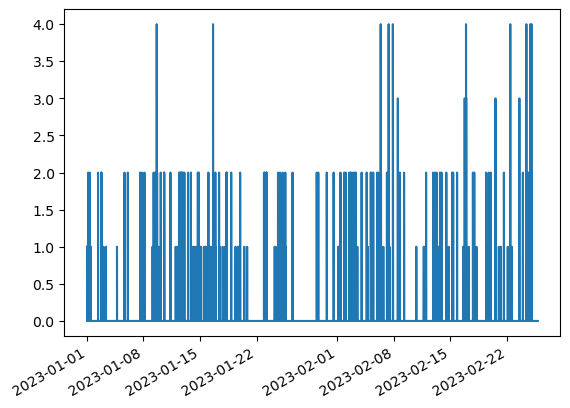

In [97]:
mta.n_anomalies.to_frame()['observed_values'].plot()

In [20]:
df = mta.anomaly_reports


In [ ]:
import plotly.express as px


In [224]:
df = mta.anomaly_reports

X = df.set_index(['timestamp', 'src', 'dest']).stack().reset_index()
X = X[X[0] == True]
print(X.index.min())
X.columns = ["timestamp",  "source", "destination", "anomaly", "value"]
X["value"] = X["value"].astype(int)


period = "8H"
stacked = True
mode =  "stack" if stacked else "group"
X = (X[["timestamp", "value", "anomaly"]].groupby("anomaly").resample(period, on='timestamp').sum(numeric_only=True).fillna(method='ffill').reset_index())
# X = (X[["timestamp", "value", "anomaly"]].groupby("anomaly").reset_index())
Y = X[X['value']>0]
fig = px.bar(Y, x="timestamp", y="value", color="anomaly", barmode=mode, title=f"Anomaly detection for ")

fig.update_layout(bargap=0,
                  bargroupgap = 0,
                 )
                
fig.update_layout(
    barmode='stack',
    yaxis=dict(
        title='Number of anomalies'
    ),
    xaxis=dict(
        title='Time'
    ),
    title=None
    # bargap=0.0001  # Adjust this value to change bar width indirectly
)
fig.show(config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 700,
    'width': 1800,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

2


In [216]:
df = mta.anomaly_reports

X = df.set_index(['timestamp', 'src', 'dest']).stack().reset_index()
X = X[X[0] == True]
X.columns = ["timestamp",  "source", "destination", "anomaly", "value"]
X["value"] = X["value"].astype(int)


period = "1H"
stacked = True
mode =  "stack" if stacked else "group"
X = (X[["timestamp", "value", "anomaly"]].groupby("anomaly").resample(period, on='timestamp').sum(numeric_only=True).reset_index())
# X = (X[["timestamp", "value", "anomaly"]].groupby("anomaly").reset_index())
Y = X[X['value']>0]
fig = px.scatter(Y, x="timestamp", y="value", color="anomaly", title=f"Anomaly detection for ")

fig.update_layout(bargap=0,
                  bargroupgap = 0,
                 )
                
fig.update_layout(
    barmode='stack',
    yaxis=dict(
        title='Number of anomalies'
    ),
    xaxis=dict(
        title='Time'
    ),
    title=f"Site level anomalies"
    # bargap=0.0001  # Adjust this value to change bar width indirectly
)
fig.show(config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 1400,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

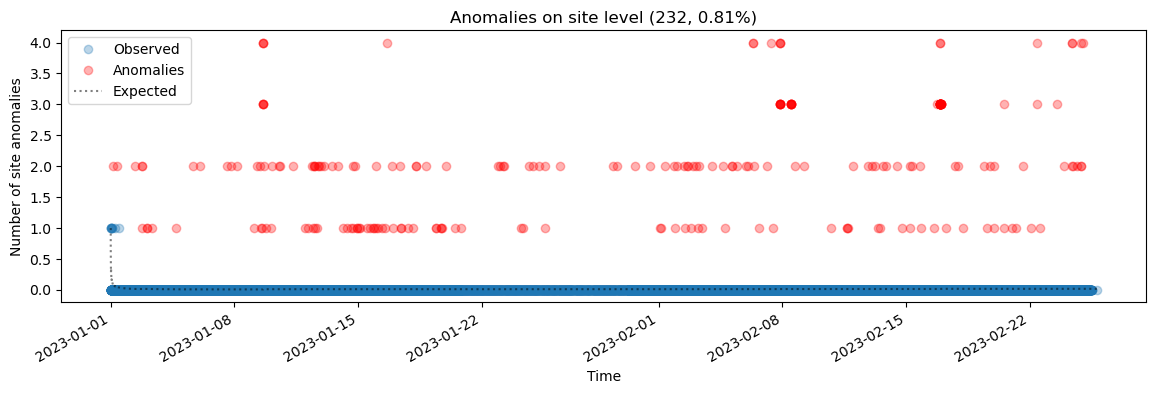

In [226]:
fig = plt.figure(figsize=(14, 4))
ax = plt.gca()
mta.n_anomalies.plot(kind='site level', ax=ax)
ax.set_ylabel("Number of site anomalies")
ax.set_xlabel("Time")

fig.savefig("results/figures/anoms.png", dpi=300, bbox_inches='tight')